In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv


In [2]:
import pandas as pd

# Load the dataset into a DataFrame
df_salary = pd.read_csv('/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv')

# Display the first few rows of the dataset
df_salary.head()


work_year experience_level employment_type                job_title  \
0       2023               EN              FT        Applied Scientist   
1       2023               EN              FT        Applied Scientist   
2       2023               EN              FT     Data Quality Analyst   
3       2023               EN              FT  Compliance Data Analyst   
4       2023               EN              FT        Applied Scientist   

   salary salary_currency  salary_in_usd company_location company_size  
0  213660             USD         213660               US            L  
1  130760             USD         130760               US            L  
2  100000             USD         100000               NG            L  
3   30000             USD          30000               NG            L  
4  204620             USD         204620               US            L

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


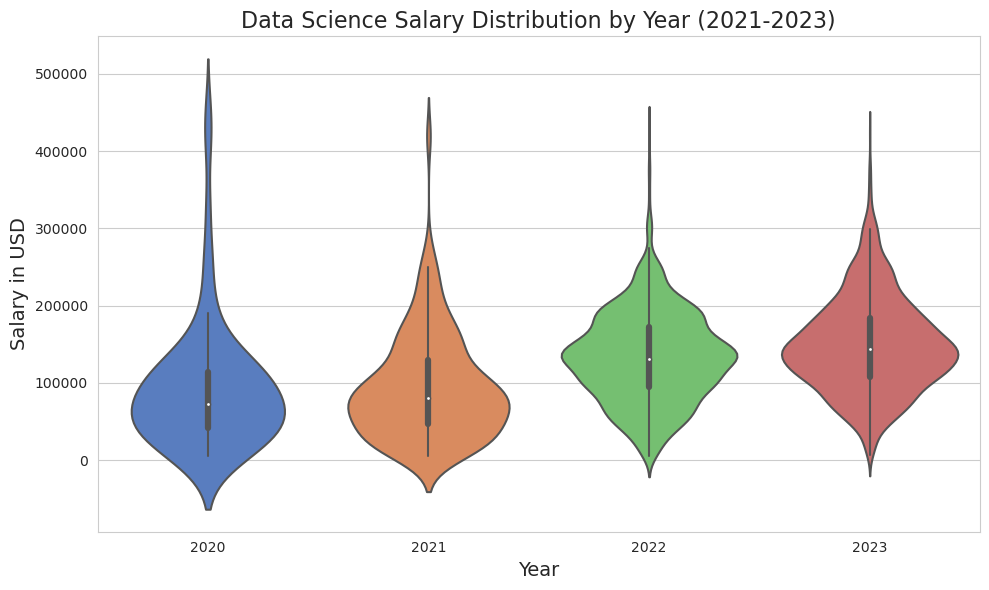

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create a violin plot for salary distribution by year
sns.violinplot(x="work_year", y="salary_in_usd", data=df_salary, palette="muted")

# Set plot title and labels
plt.title("Data Science Salary Distribution by Year (2021-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.tight_layout()

plt.show()


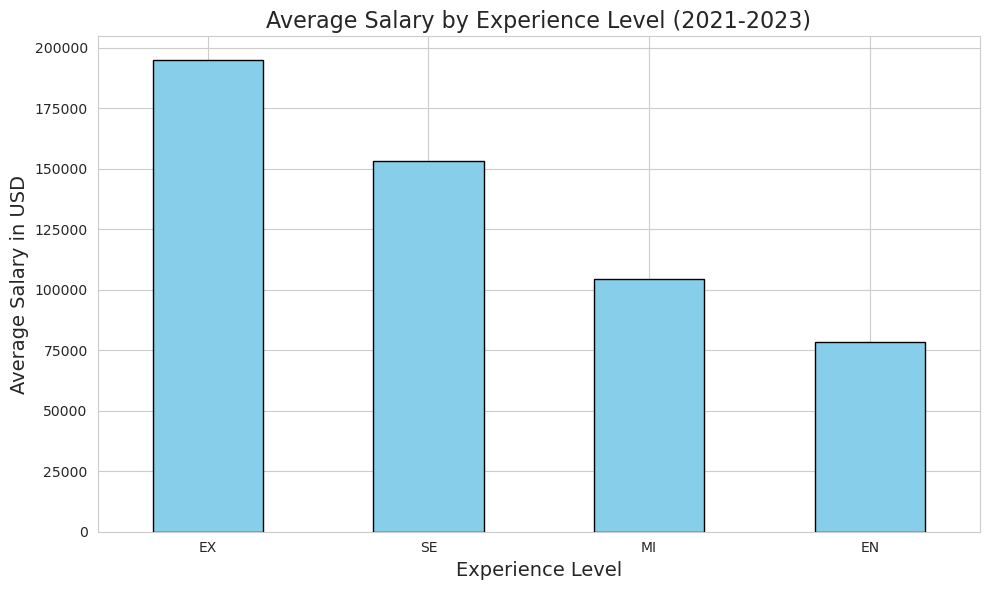

In [4]:
# Calculate the average salary for each experience level
avg_salary_by_experience = df_salary.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
avg_salary_by_experience.plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot title and labels
plt.title("Average Salary by Experience Level (2021-2023)", fontsize=16)
plt.xlabel("Experience Level", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


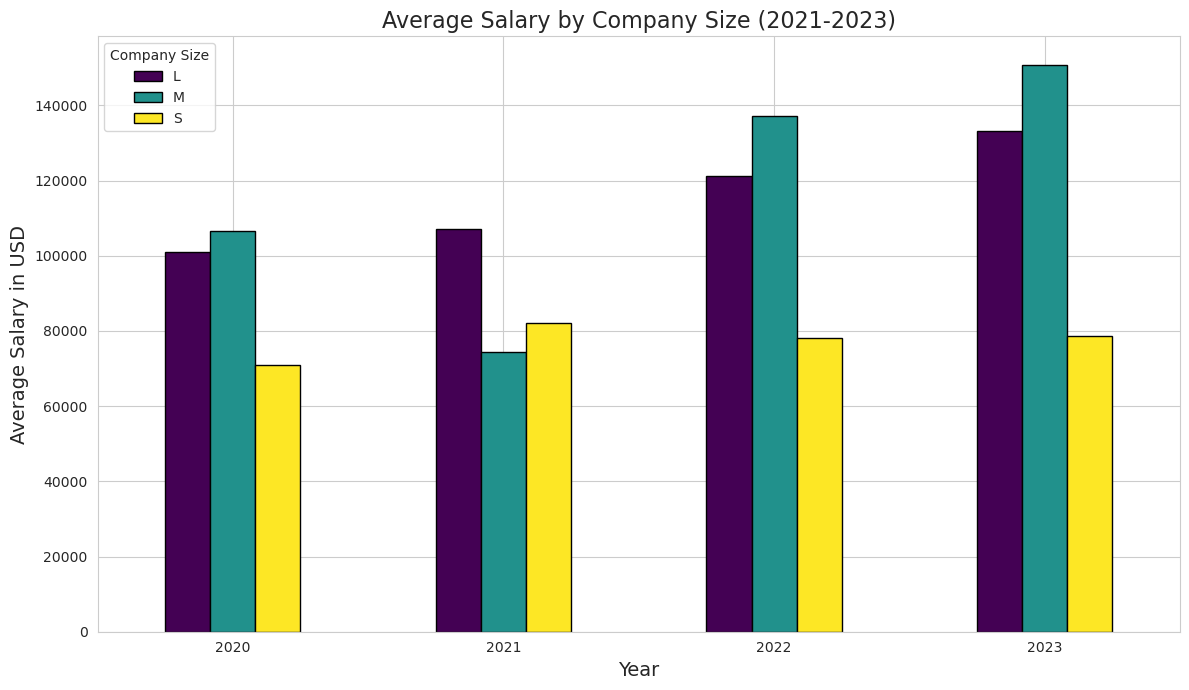

In [5]:
# Calculate the average salary for each company size and year
avg_salary_by_company_size = df_salary.groupby(["work_year", "company_size"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(12, 7))
avg_salary_by_company_size.plot(kind='bar', ax=plt.gca(), colormap='viridis', edgecolor='black')

# Set plot title and labels
plt.title("Average Salary by Company Size (2021-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Company Size")
plt.tight_layout()

plt.show()


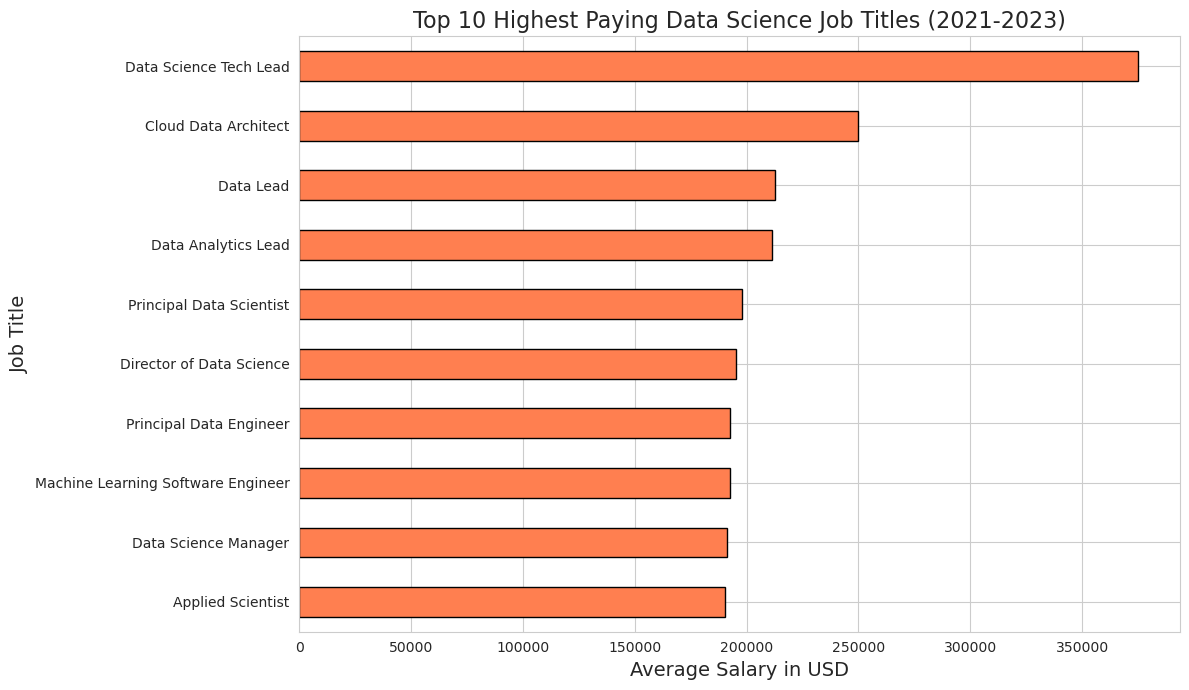

In [6]:
# Calculate the average salary for each job title
avg_salary_by_job_title = df_salary.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)

# Get the top 10 highest paying job titles
top_10_jobs = avg_salary_by_job_title.head(10)

# Plotting
plt.figure(figsize=(12, 7))
top_10_jobs.plot(kind='barh', color='coral', edgecolor='black')

# Set plot title and labels
plt.title("Top 10 Highest Paying Data Science Job Titles (2021-2023)", fontsize=16)
plt.xlabel("Average Salary in USD", fontsize=14)
plt.ylabel("Job Title", fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest paying job at the top
plt.tight_layout()

plt.show()


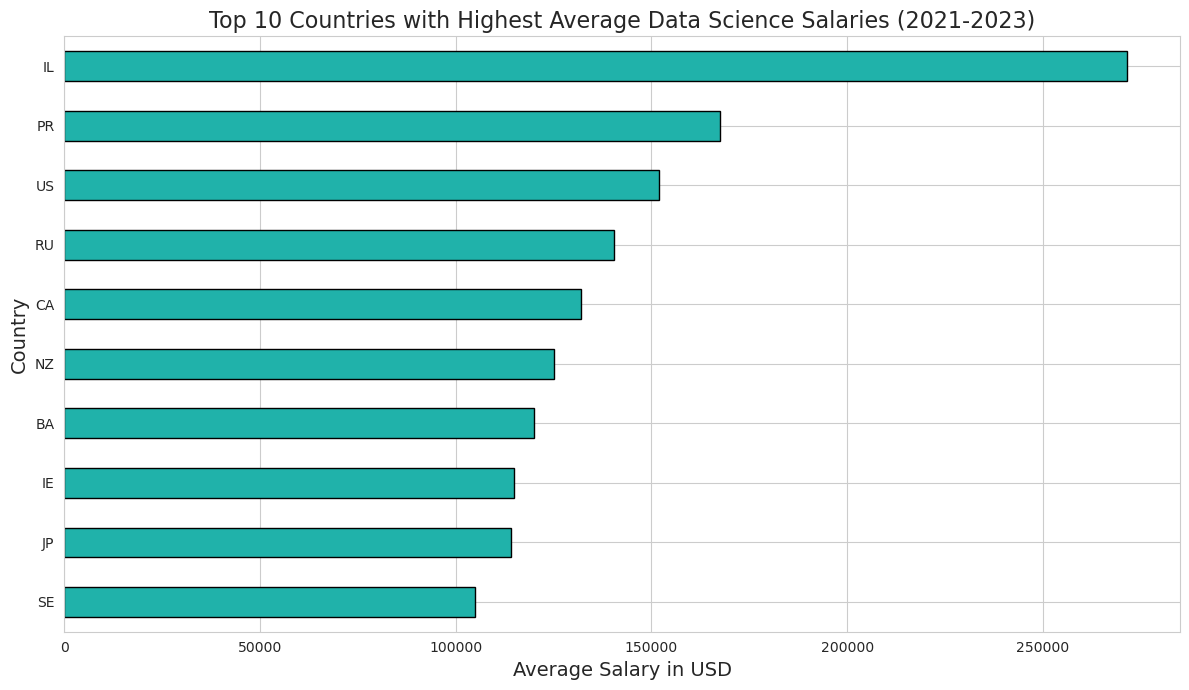

In [7]:
import geopandas as gpd
import geopandas.tools

# Calculate the average salary for each country
avg_salary_by_country = df_salary.groupby("company_location")["salary_in_usd"].mean()


# Get the top 10 countries with the highest average salaries
top_10_countries = avg_salary_by_country.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 7))
top_10_countries.plot(kind='barh', color='lightseagreen', edgecolor='black')

# Set plot title and labels
plt.title("Top 10 Countries with Highest Average Data Science Salaries (2021-2023)", fontsize=16)
plt.xlabel("Average Salary in USD", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest paying country at the top
plt.tight_layout()

plt.show()


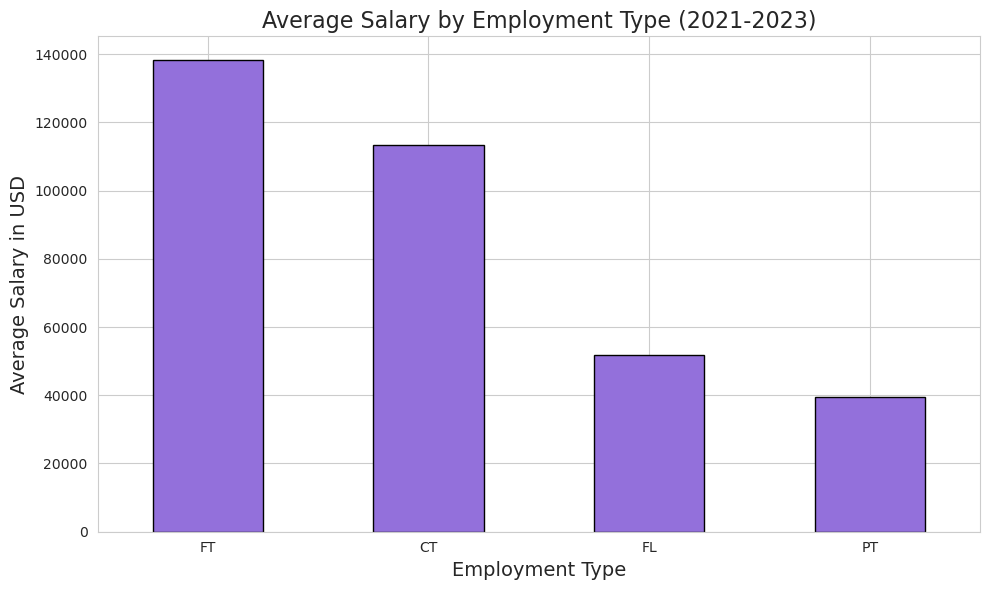

In [8]:
# Calculate the average salary for each employment type
avg_salary_by_employment_type = df_salary.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
avg_salary_by_employment_type.plot(kind='bar', color='mediumpurple', edgecolor='black')

# Set plot title and labels
plt.title("Average Salary by Employment Type (2021-2023)", fontsize=16)
plt.xlabel("Employment Type", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


**From the plot, we can observe:**

1. Full-Time (FT) roles command the highest average salary. This is expected as full-time roles typically come with additional benefits, security, and expectations compared to other employment types.
2. Contractors (CT) come next, indicating that while they might not have the same job security as full-time roles, they can command competitive rates due to specialized expertise or short-term project needs.
3. Freelancers (FL) have a lower average salary than full-timers and contractors. This might be influenced by the inconsistency in projects, competition, or potentially taking on smaller tasks.


> Part-Time (PT) roles, as expected, have the lowest average salary, reflecting the reduced hours and responsibilities compared to full-time positions.

/tmp/ipykernel_20/36089513.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


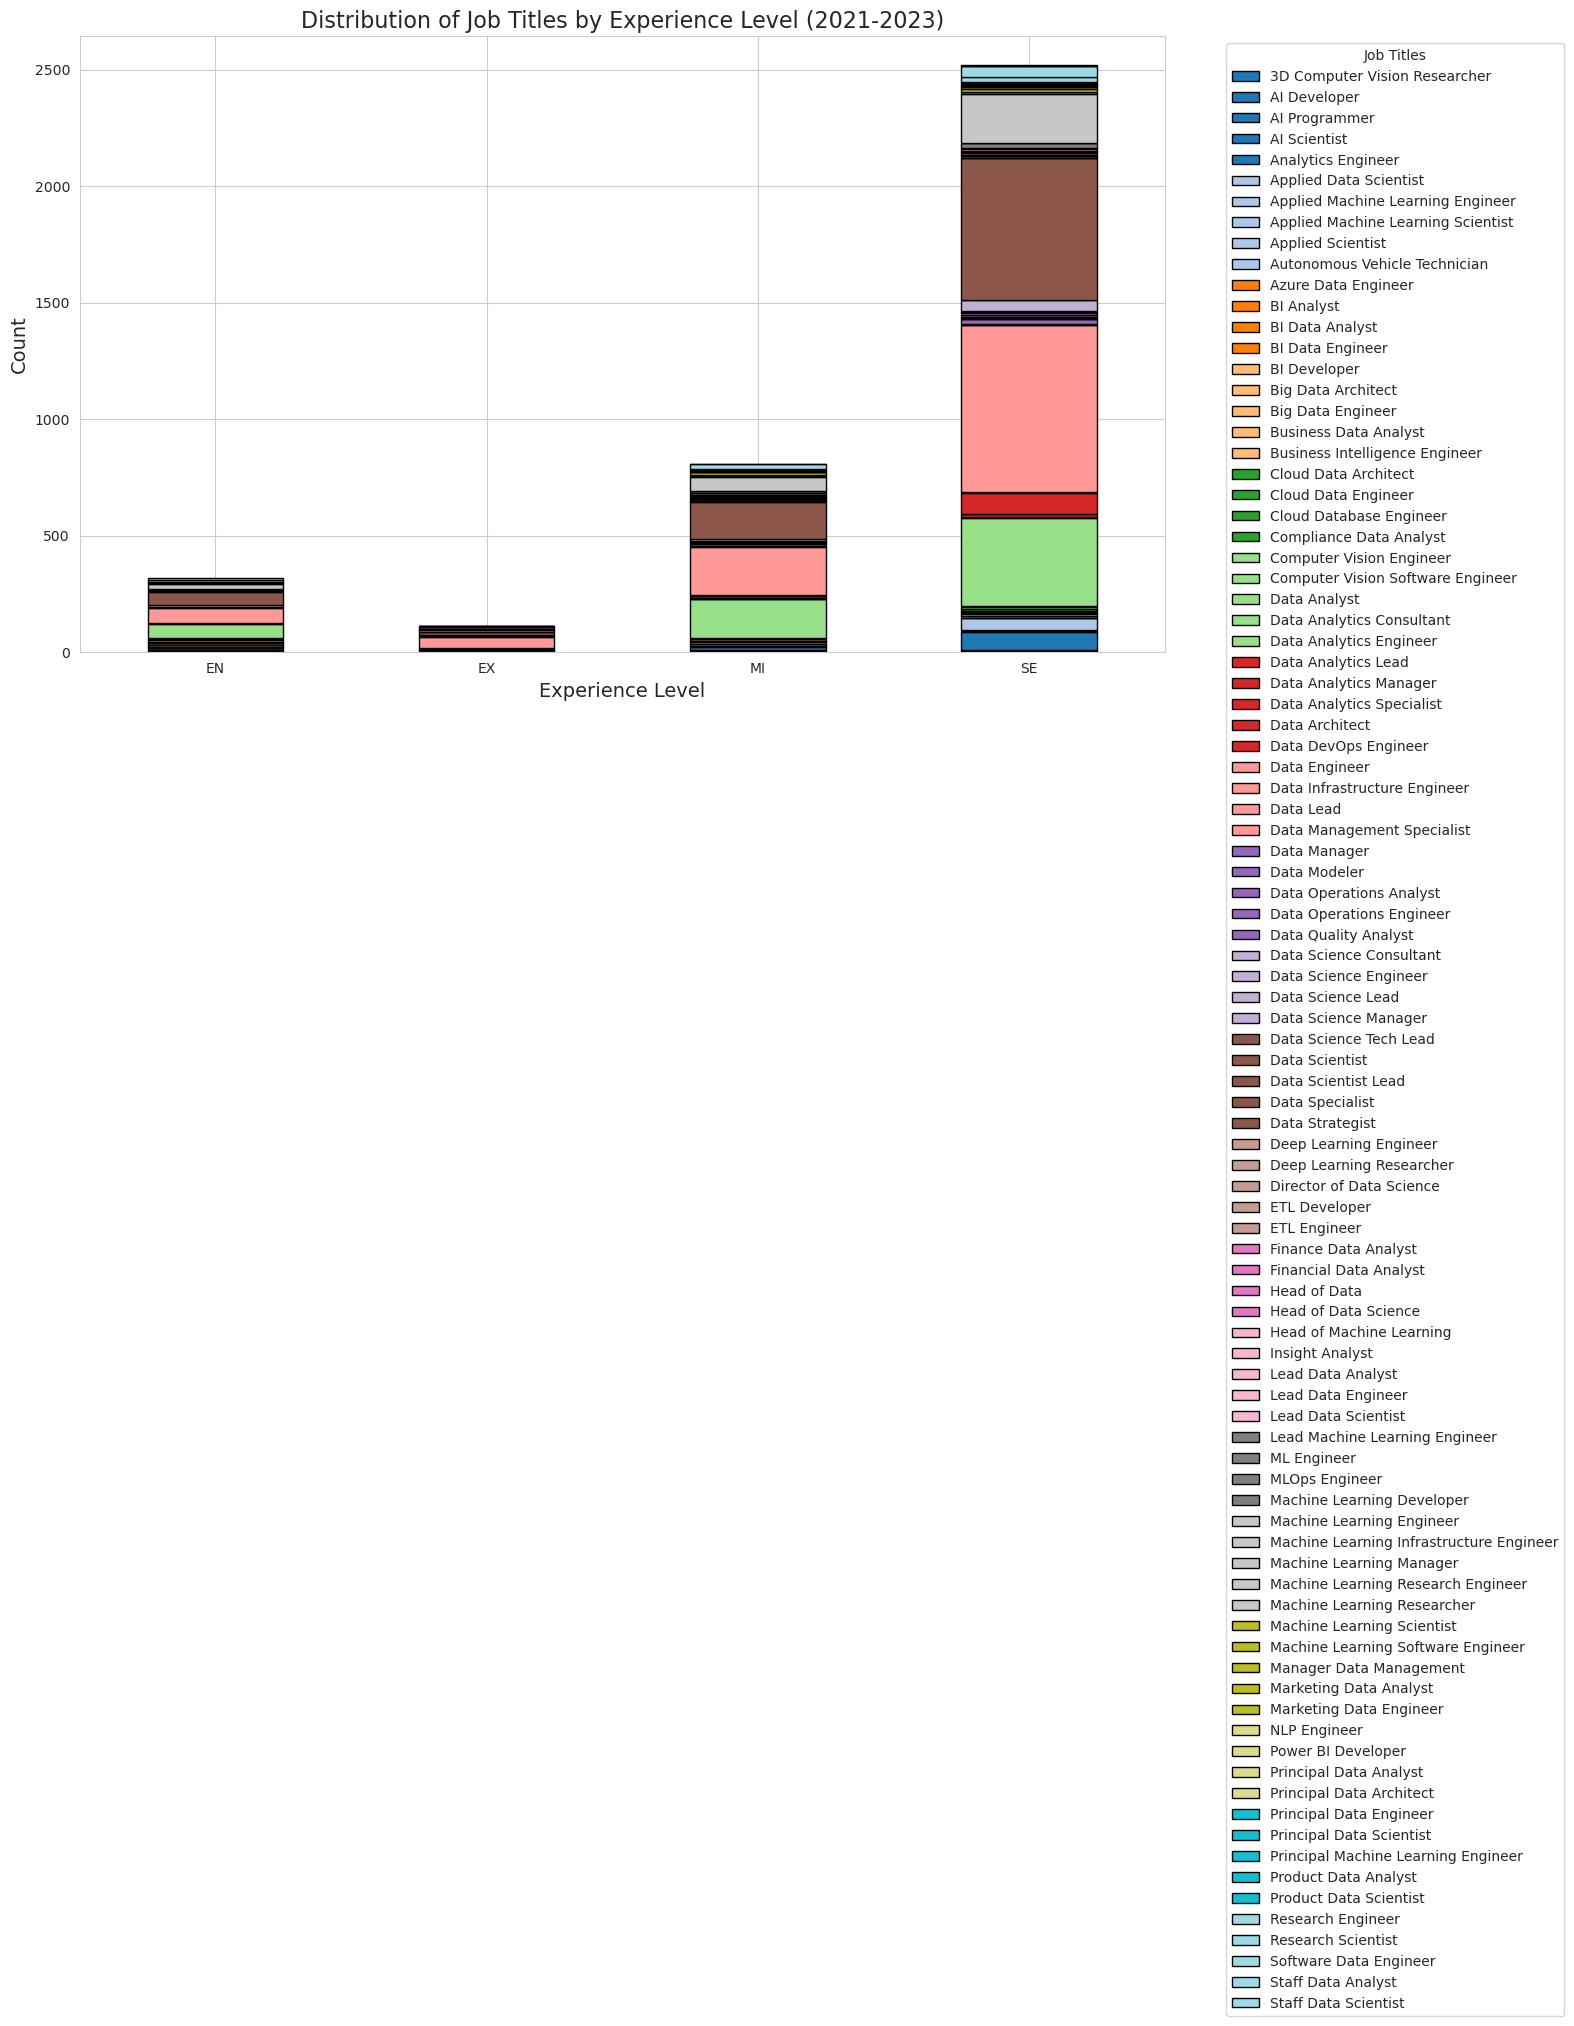

In [9]:
# Count of job titles within each experience level
job_title_dist = df_salary.groupby(['experience_level', 'job_title']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
job_title_dist.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca(), edgecolor='black')

# Set plot title and labels
plt.title("Distribution of Job Titles by Experience Level (2021-2023)", fontsize=16)
plt.xlabel("Experience Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Job Titles", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


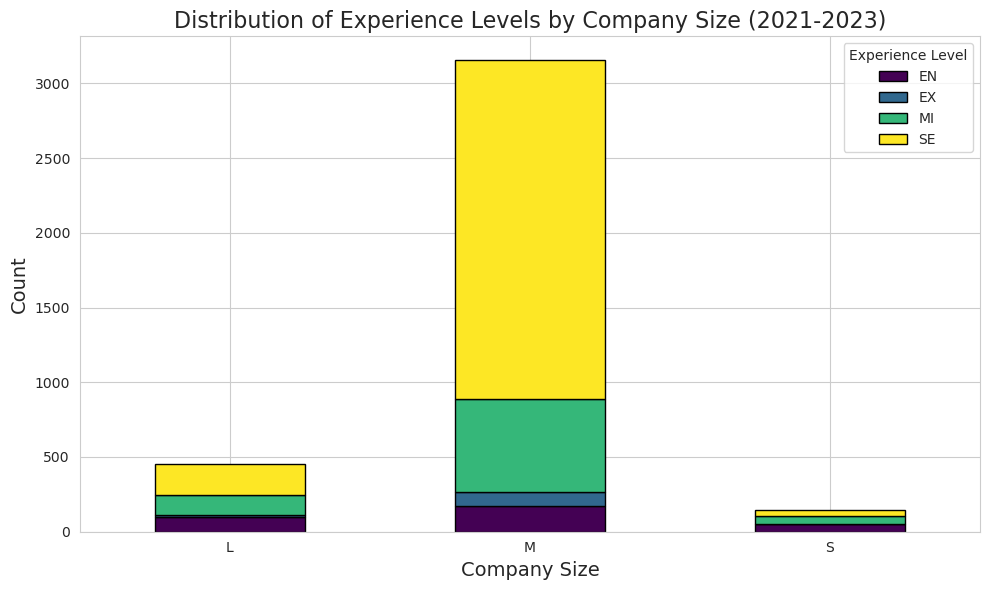

In [10]:
# Count of experience levels within each company size
experience_dist = df_salary.groupby(['company_size', 'experience_level']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
experience_dist.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca(), edgecolor='black')

# Set plot title and labels
plt.title("Distribution of Experience Levels by Company Size (2021-2023)", fontsize=16)
plt.xlabel("Company Size", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Experience Level")
plt.tight_layout()

plt.show()


**From the visualization, we can infer:**

1. Small (S) Companies: These companies have a diverse mix of experience levels. It's interesting to note that there's a significant number of senior professionals, suggesting that small companies might be started or run by experienced individuals or they prioritize hiring seasoned experts to drive growth.
2. Medium (M) Companies: The experience distribution is more balanced, with a considerable number of mid-level and experienced professionals. This could indicate a growing or established company structure.
3. Large (L) Companies: There's a broad mix of experience levels, with a dominant presence of mid-level and experienced professionals. This suggests that large companies have established teams with a diverse set of roles and responsibilities.

> This visualization provides insights into the typical team compositions based on company size, which can be valuable for job seekers trying to understand the kind of teams they might join and for companies assessing their own hiring dynamics.

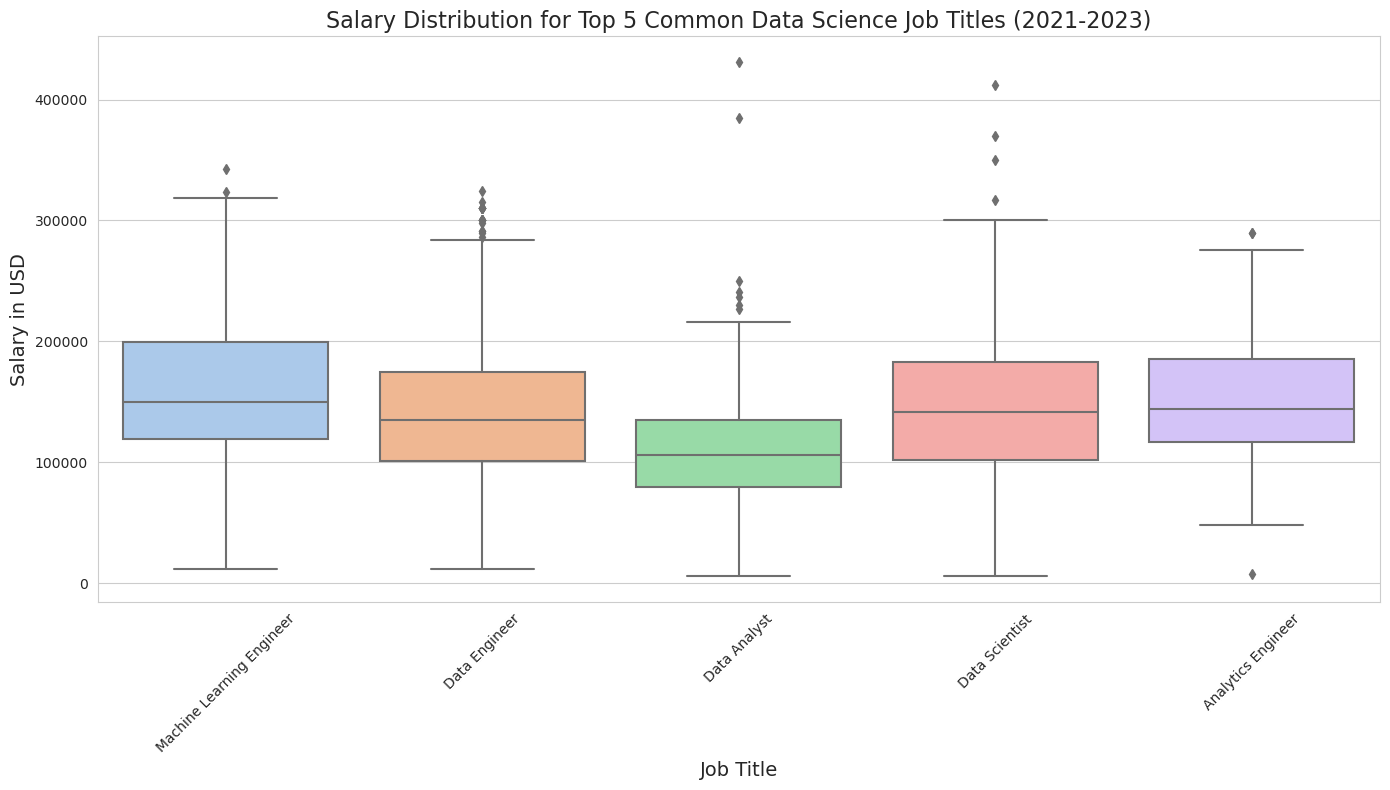

In [11]:
# Identify the top 5 most common job titles
top_5_titles = df_salary['job_title'].value_counts().head(5).index.tolist()

# Filter the dataset to only include these top 5 job titles
df_top_titles = df_salary[df_salary['job_title'].isin(top_5_titles)]

# Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x="job_title", y="salary_in_usd", data=df_top_titles, palette="pastel")

# Set plot title and labels
plt.title("Salary Distribution for Top 5 Common Data Science Job Titles (2021-2023)", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**From the visualization, we can observe:**

* Each job title has a varied salary distribution, indicating the range of salaries professionals can expect in these roles.
* The median salary (indicated by the line inside the box) differs for each role, with some roles having a higher median than others.
* There are some potential outliers (indicated by dots above the "whiskers" of the box plot) for several job titles, suggesting that some professionals earn significantly more than their peers in the same role.


> This visualization provides insights into the salary dynamics of popular Data Science roles and can be valuable for professionals looking to understand compensation standards for these roles.

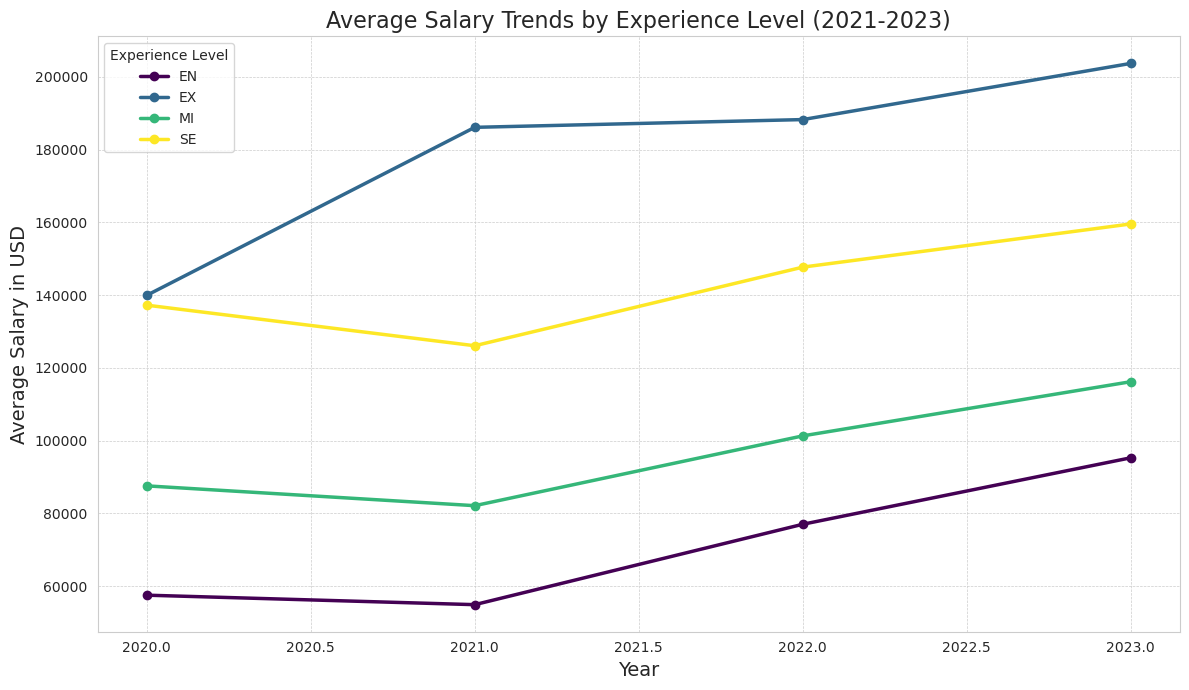

In [12]:
# Calculate the average salary for each experience level and year
avg_salary_by_year_experience = df_salary.groupby(["work_year", "experience_level"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(12, 7))
avg_salary_by_year_experience.plot(ax=plt.gca(), marker='o', colormap='viridis', linewidth=2.5)

# Set plot title, labels, and legend
plt.title("Average Salary Trends by Experience Level (2021-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.legend(title="Experience Level")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


**From the visualization, we can derive:**

* **Senior (SE) Professionals:** Their average salary has seen a steady increase over the years, maintaining their position as the highest earners.
* **Experienced (EX) and Mid-Level (MI) Professionals:** Both these categories exhibit a similar trend, with a clear increase in average salaries from 2021 to 2023.
* **Entry-Level (EN) Professionals:** While they remain the lowest earners, their average salary has also seen growth, indicating positive trends across all experience levels.

> The consistent upward trend across all experience levels suggests an overall positive growth in the Data Science industry, with increasing value placed on professionals at every stage of their career.

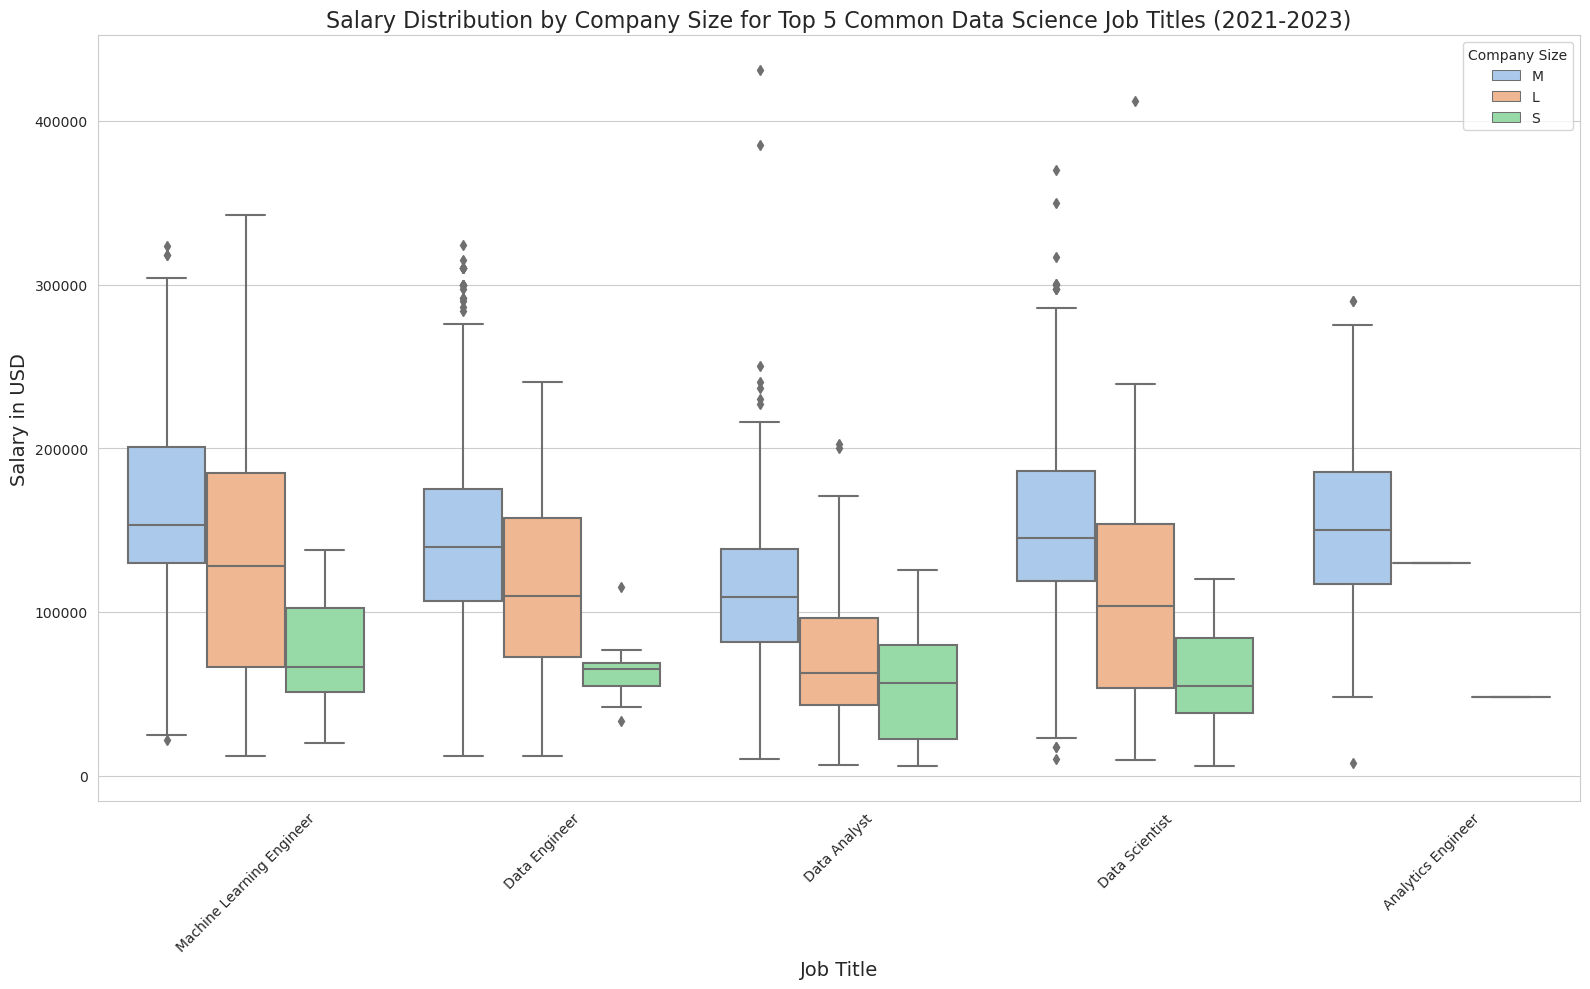

In [13]:
# Plotting
plt.figure(figsize=(16, 10))
sns.boxplot(x="job_title", y="salary_in_usd", hue="company_size", data=df_top_titles, palette="pastel")

# Set plot title, labels, and legend
plt.title("Salary Distribution by Company Size for Top 5 Common Data Science Job Titles (2021-2023)", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Company Size")
plt.tight_layout()

plt.show()


> Here's a series of box plots showcasing the salary distribution by company size for the top 5 most common Data Science job titles in the dataset for the years 2021 to 2023.

**From the visualization, we can observe:**

* For most of the common job titles, large companies (L) tend to offer higher median salaries compared to medium (M) and small (S) companies.
* The salary range (as indicated by the height of the boxes and whiskers) also varies based on company size. Larger companies generally exhibit a broader salary range, suggesting a wider variety of roles and responsibilities within the same job title.
* Some roles, especially in larger companies, have potential outliers (dots above the whiskers), indicating that some individuals earn significantly more than their peers in similar roles.


> This visualization provides insights into how company size can influence salary dynamics for popular Data Science roles. It's valuable for professionals considering opportunities in different types of companies and for organizations benchmarking their compensation strategies.

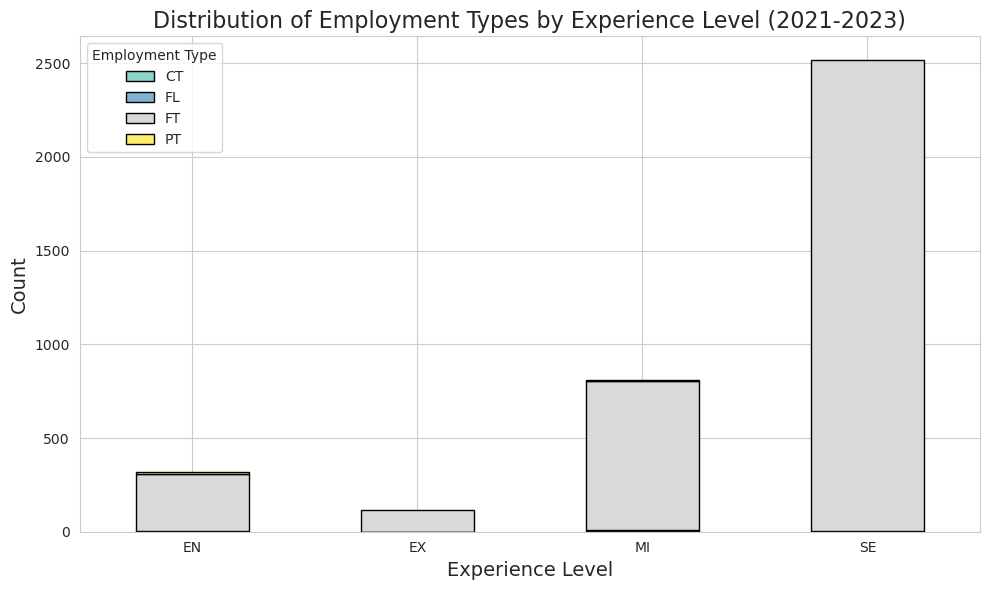

In [14]:
# Count of employment types within each experience level
employment_type_dist = df_salary.groupby(['experience_level', 'employment_type']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
employment_type_dist.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca(), edgecolor='black')

# Set plot title and labels
plt.title("Distribution of Employment Types by Experience Level (2021-2023)", fontsize=16)
plt.xlabel("Experience Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Employment Type")
plt.tight_layout()

plt.show()


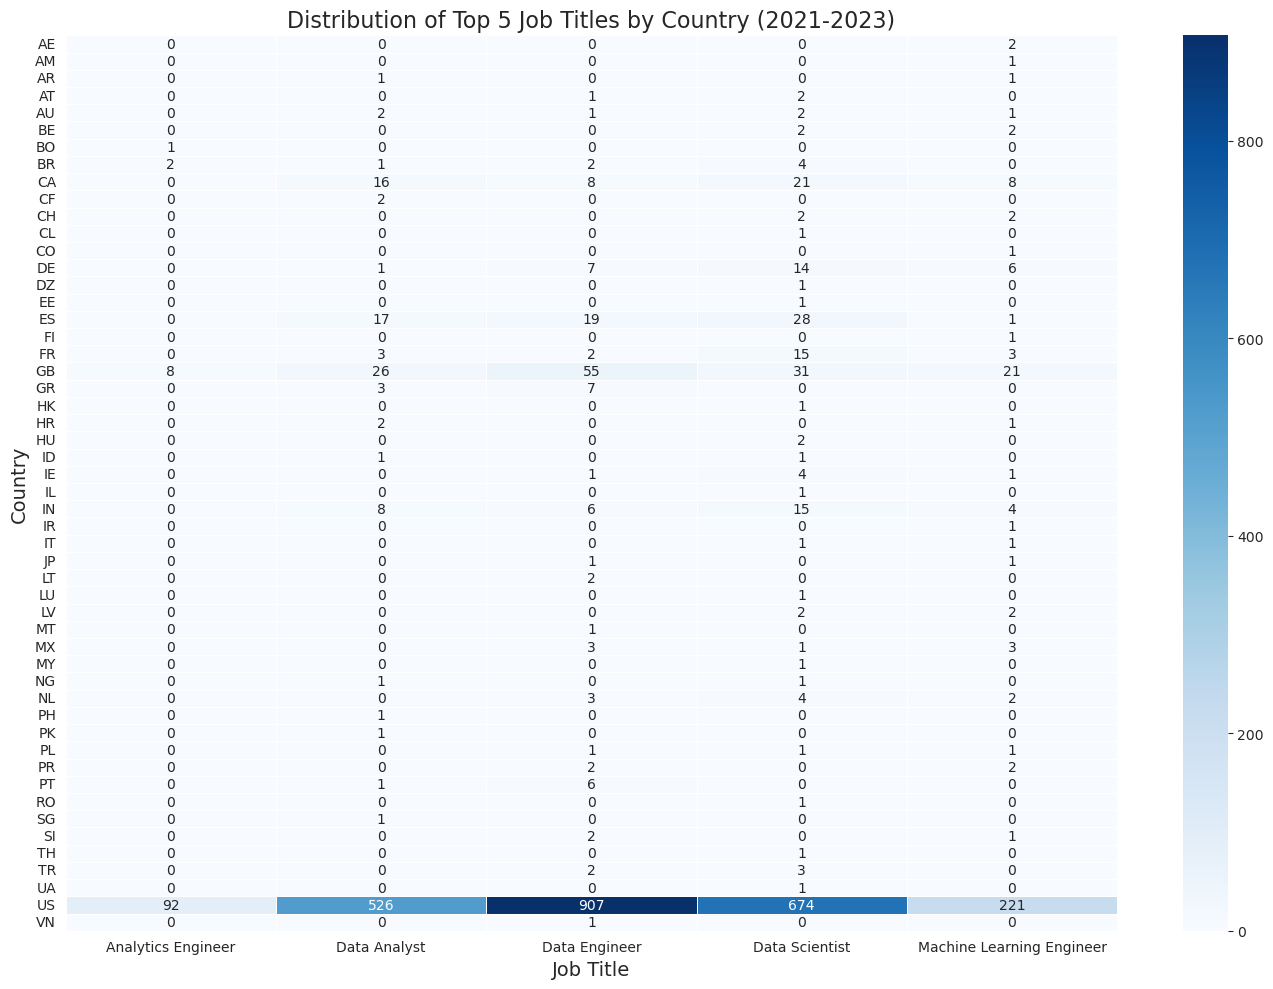

In [15]:
# Count of job titles within each country for the top 5 job titles
job_title_country_dist = df_top_titles.groupby(['company_location', 'job_title']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 10))
sns.heatmap(job_title_country_dist, cmap='Blues', annot=True, fmt=".0f", linewidths=0.5)

# Set plot title and labels
plt.title("Distribution of Top 5 Job Titles by Country (2021-2023)", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()

plt.show()


> *Heatmap showcasing the distribution of the top 5 most common Data Science job titles across different countries for the years 2021 to 2023.*

**From the visualization, we can observe:**

* Certain job titles are more prevalent in specific countries, suggesting regional demands or hubs for these roles.
* The darker shades in the heatmap indicate a higher count, meaning that particular job title is more common in that country.
* Some countries are dominant hubs for multiple roles, indicating a broader demand for Data Science professionals.


> This visualization can be particularly insightful for professionals looking to understand the global landscape of job opportunities in Data Science. It can also help businesses and recruiters identify regions with a higher concentration of specific roles.

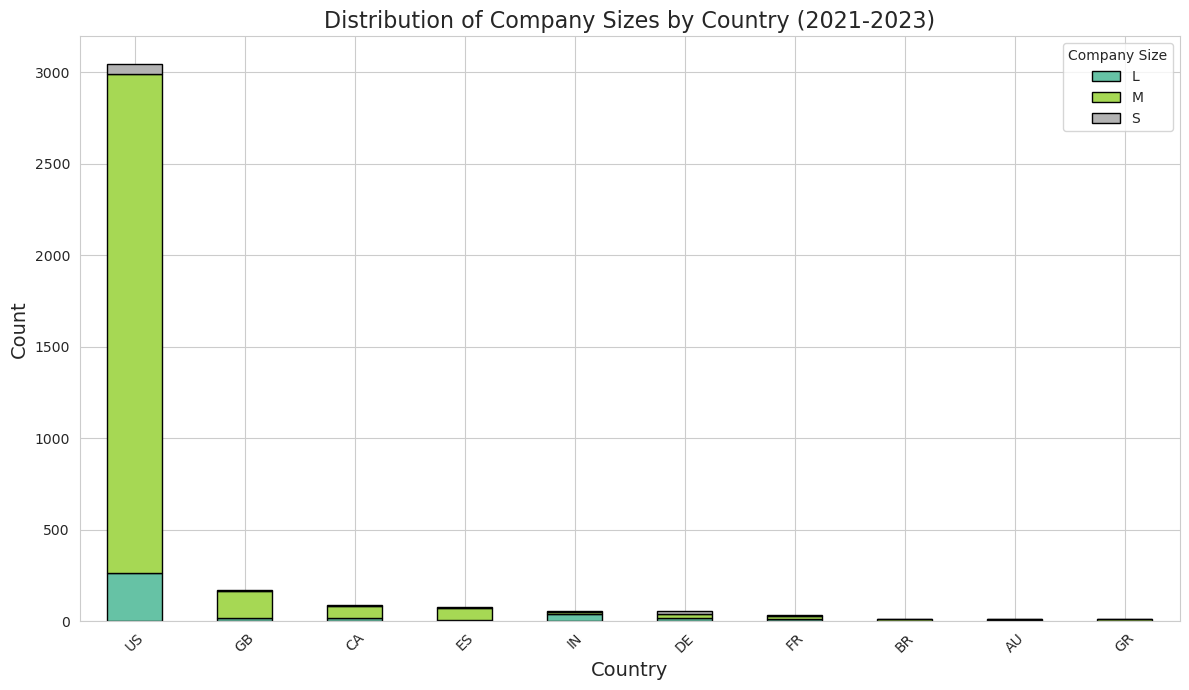

In [16]:
# Count of company sizes within each country
company_size_country_dist = df_salary.groupby(['company_location', 'company_size']).size().unstack().fillna(0)

# Filtering to top 10 countries based on total companies for better visualization
top_10_countries_size = company_size_country_dist.sum(axis=1).nlargest(10).index
company_size_country_dist = company_size_country_dist.loc[top_10_countries_size]

# Plotting
plt.figure(figsize=(12, 7))
company_size_country_dist.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca(), edgecolor='black')

# Set plot title and labels
plt.title("Distribution of Company Sizes by Country (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Company Size")
plt.tight_layout()

plt.show()


*A stacked bar plot showcasing the distribution of company sizes (Small, Medium, Large) across the top 10 countries with the most Data Science employers for the years 2021 to 2023.*

**From the visualization, we can observe:**

* **United States (US):** Dominates the chart with a significant presence of large companies, suggesting it's a major hub for established tech corporations.
* **Other Countries:** The distribution varies, with some countries, like India (IN), having a higher representation of smaller companies, potentially indicating a thriving startup scene or many local businesses.
* **Variability:** Some countries have a balanced mix of small, medium, and large companies, suggesting a diverse business landscape.

> This visualization provides a snapshot of the business environments in different countries, which can be of interest to professionals considering international opportunities or businesses looking to understand regional corporate landscapes.

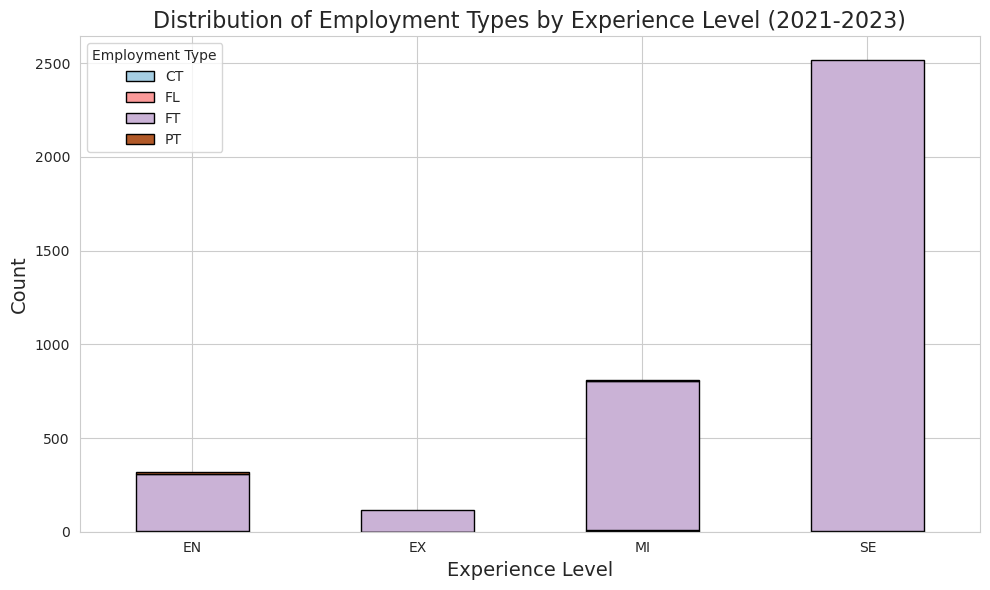

In [17]:
# Count of employment types within each experience level
experience_employment_dist = df_salary.groupby(['experience_level', 'employment_type']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
experience_employment_dist.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca(), edgecolor='black')

# Set plot title and labels
plt.title("Distribution of Employment Types by Experience Level (2021-2023)", fontsize=16)
plt.xlabel("Experience Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Employment Type")
plt.tight_layout()

plt.show()


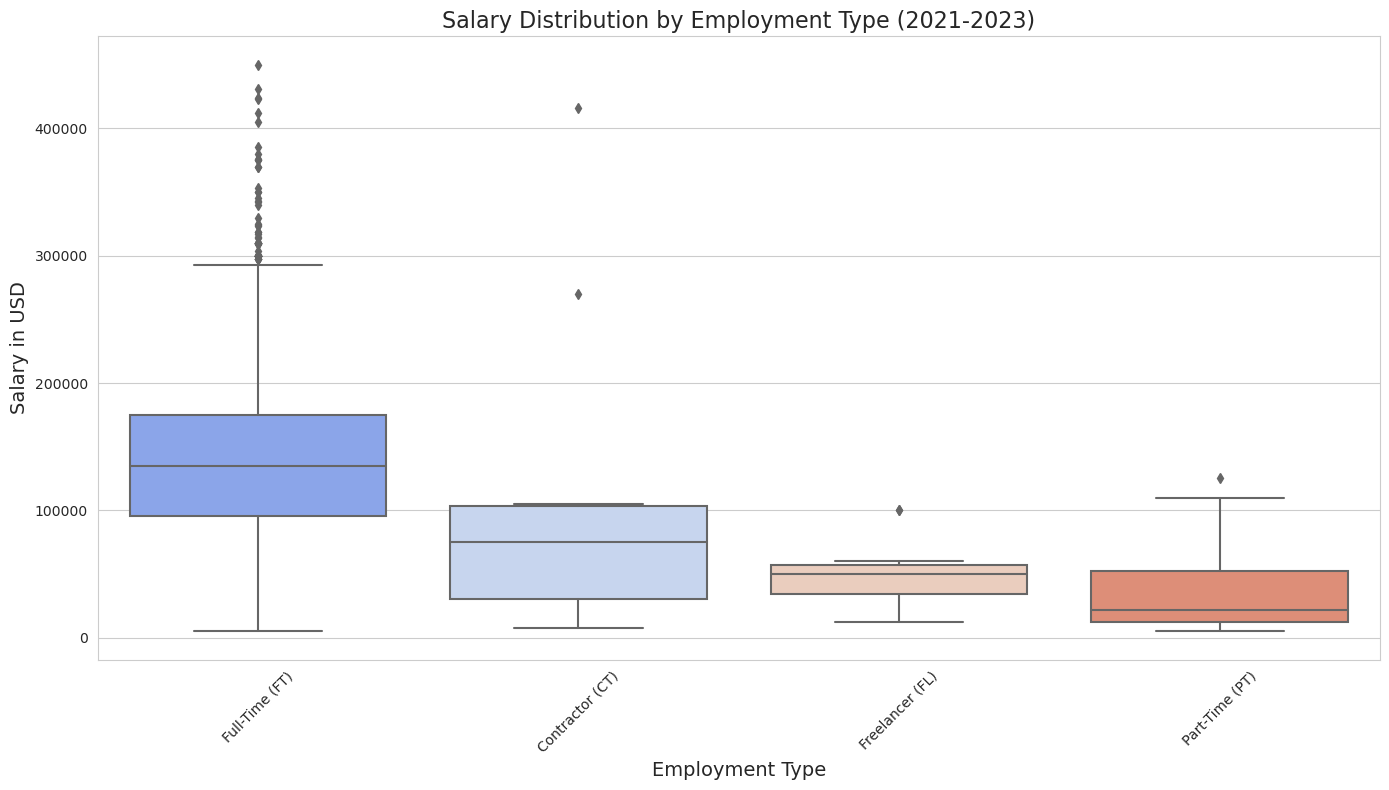

In [18]:
# Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df_salary, palette="coolwarm", order=["FT", "CT", "FL", "PT"])

# Set plot title and labels
plt.title("Salary Distribution by Employment Type (2021-2023)", fontsize=16)
plt.xlabel("Employment Type", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
labels = ["Full-Time (FT)", "Contractor (CT)", "Freelancer (FL)", "Part-Time (PT)"]
plt.xticks(ticks=[0, 1, 2, 3], labels=labels, rotation=45)
plt.tight_layout()

plt.show()


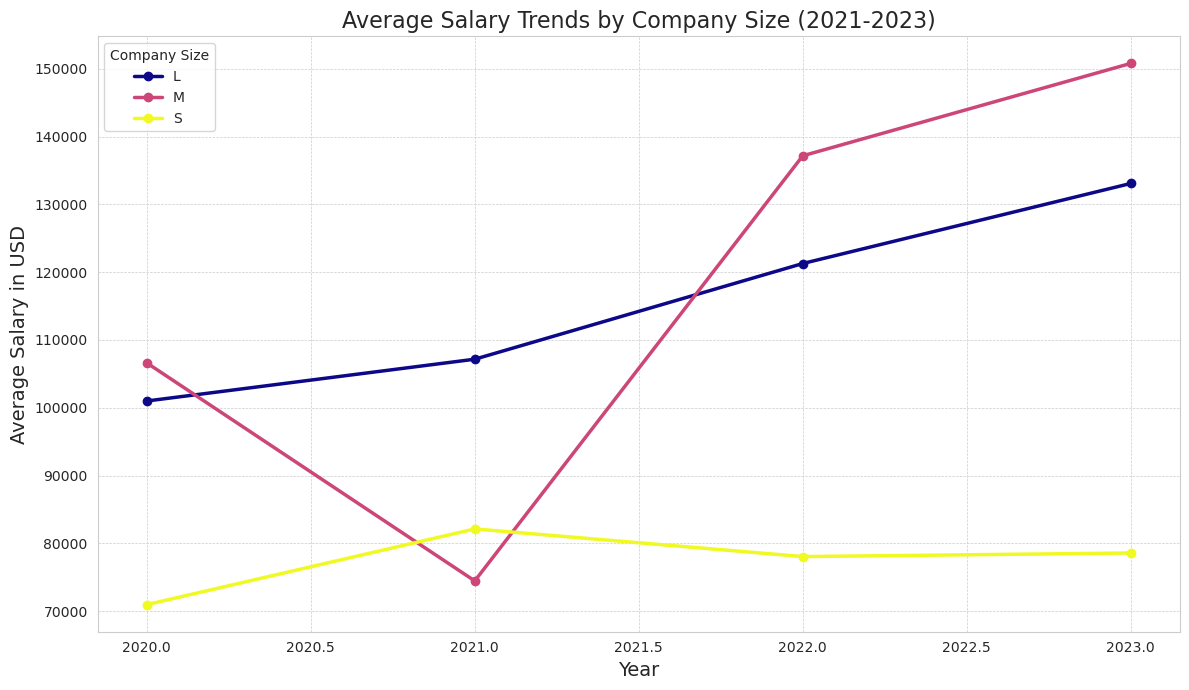

In [19]:
# Calculate the average salary for each company size and year
avg_salary_by_year_company_size = df_salary.groupby(["work_year", "company_size"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(12, 7))
avg_salary_by_year_company_size.plot(ax=plt.gca(), marker='o', colormap='plasma', linewidth=2.5)

# Set plot title, labels, and legend
plt.title("Average Salary Trends by Company Size (2021-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.legend(title="Company Size")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


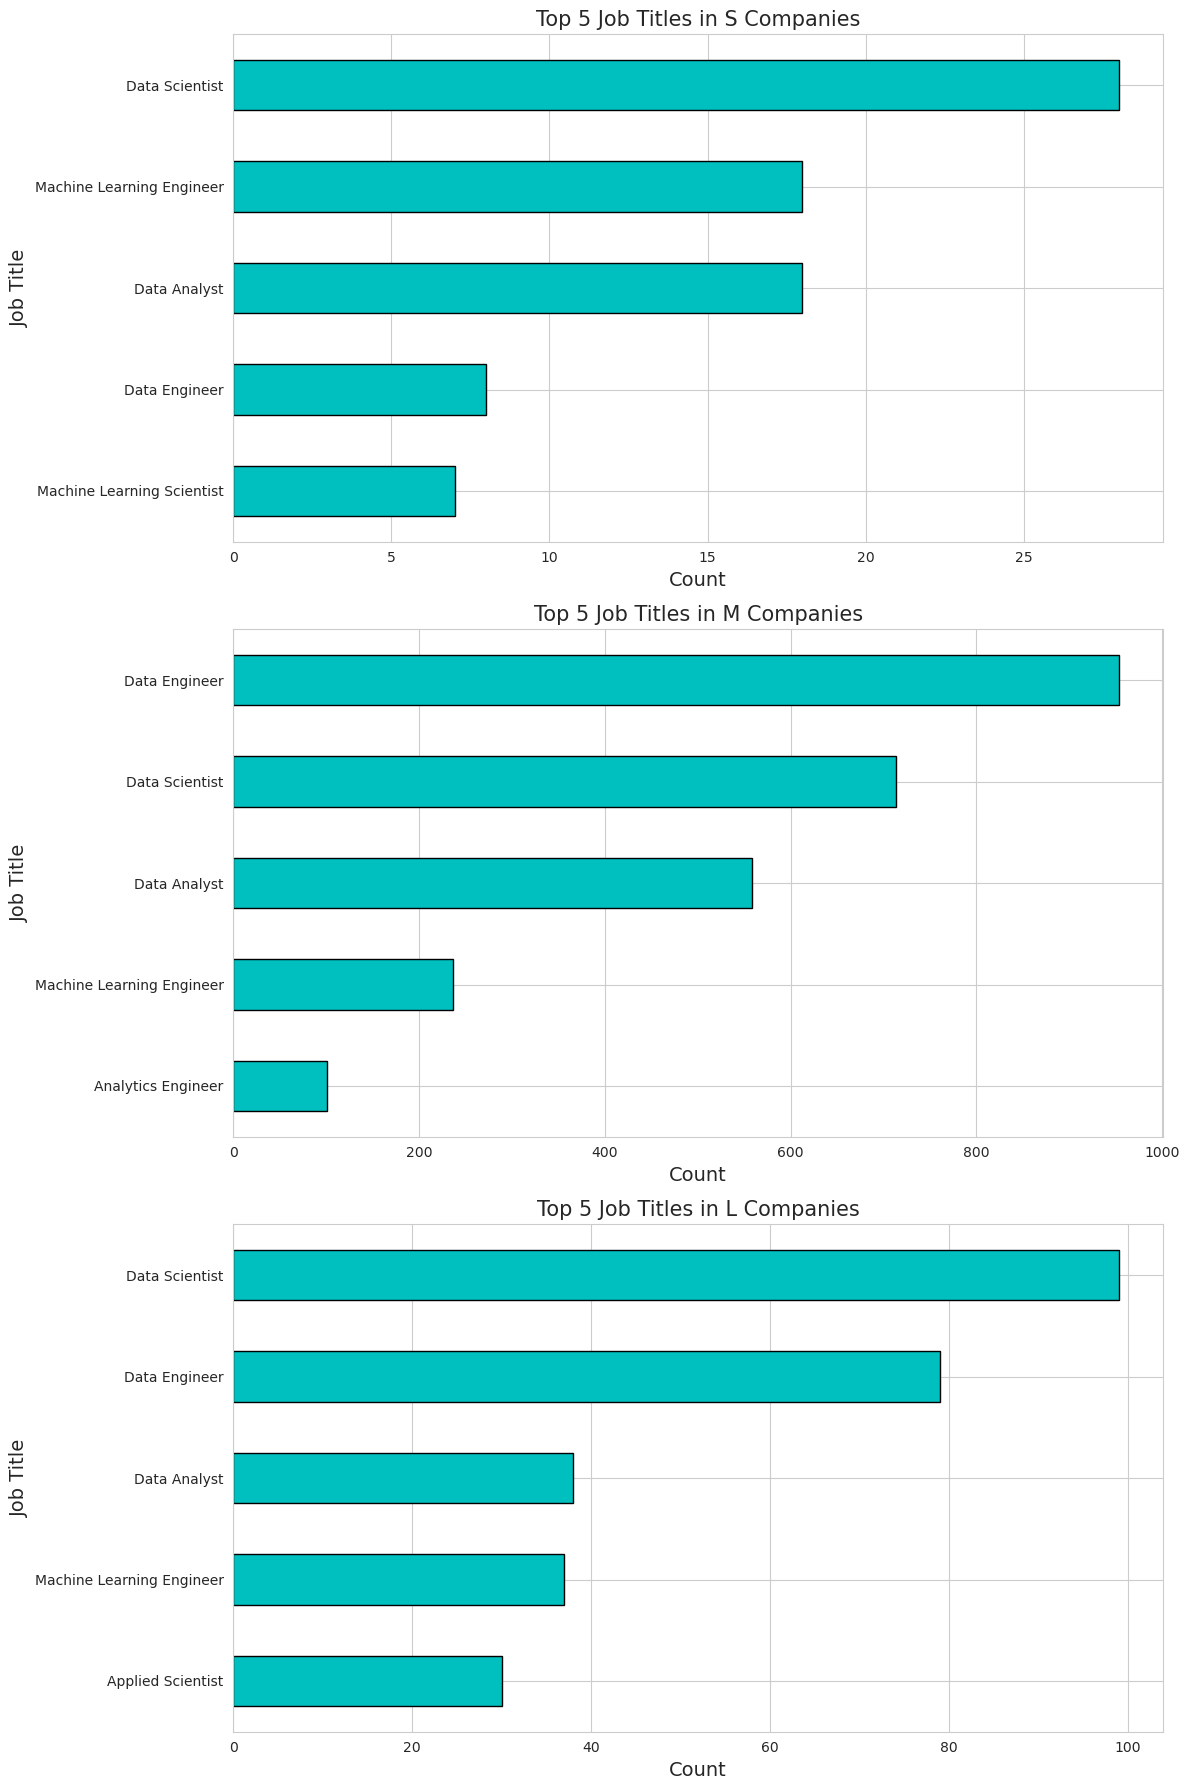

In [20]:
# Determine the top 5 job titles for each company size
top_titles_by_size = df_salary.groupby("company_size")["job_title"].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Loop to plot for each company size
for idx, size in enumerate(["S", "M", "L"]):
    top_titles_by_size[size].sort_values().plot(kind='barh', ax=axes[idx], color='c', edgecolor='black')
    axes[idx].set_title(f"Top 5 Job Titles in {size} Companies", fontsize=15)
    axes[idx].set_xlabel("Count", fontsize=14)
    axes[idx].set_ylabel("Job Title", fontsize=14)

plt.tight_layout()
plt.show()


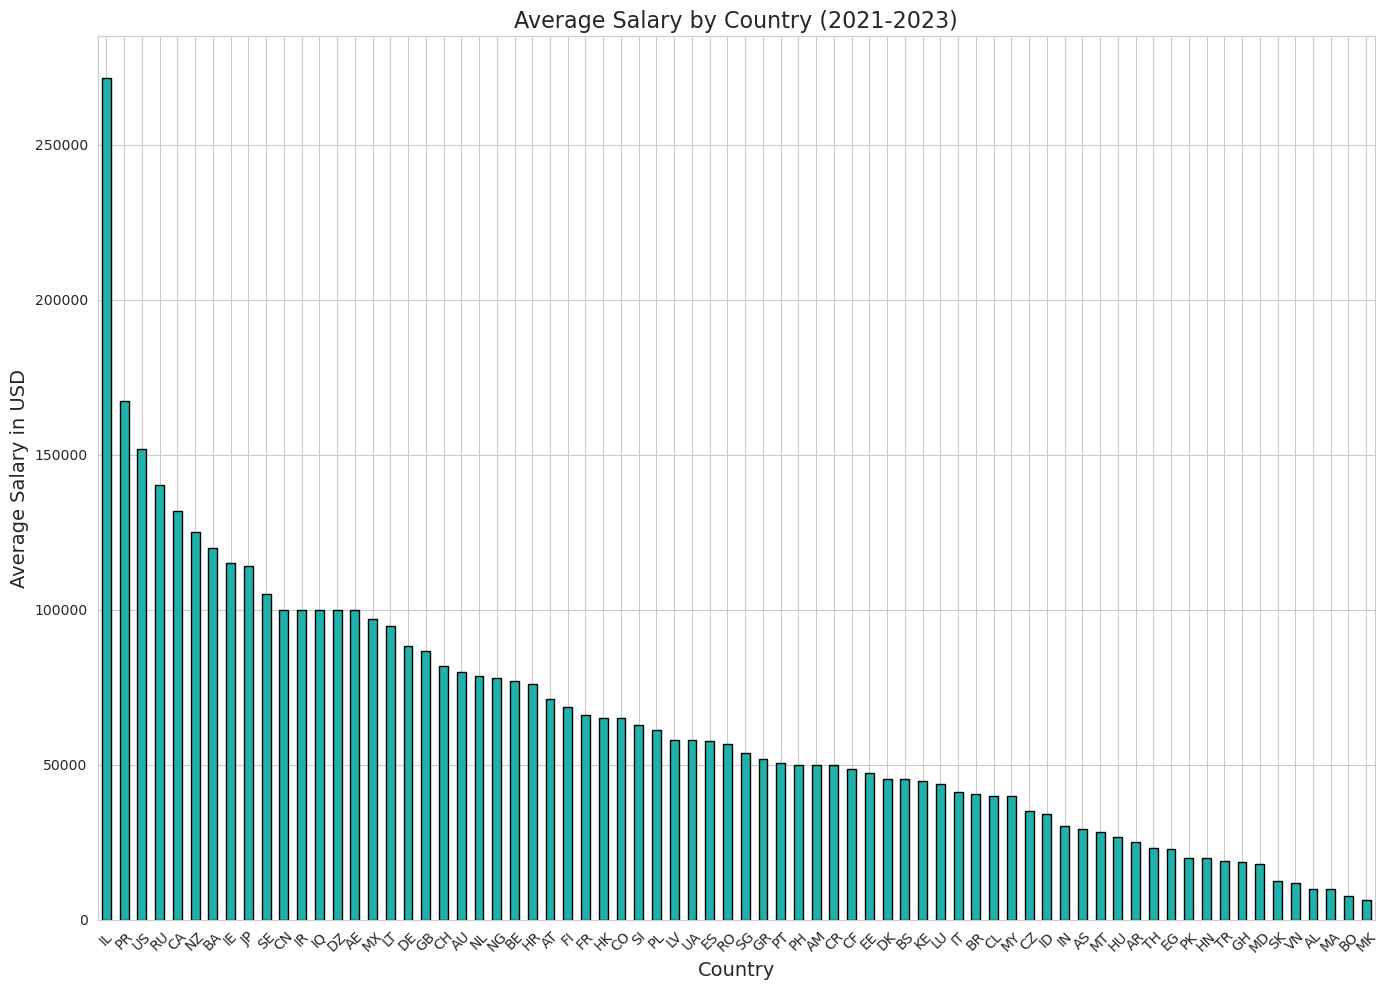

In [21]:
# Calculate the average salary for each country
avg_salary_by_country = df_salary.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 10))
avg_salary_by_country.plot(kind='bar', color='lightseagreen', edgecolor='black')

# Set plot title and labels
plt.title("Average Salary by Country (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


*A bar plot showcasing the average salary by country for the years 2021 to 2023.*

**From the visualization, we can observe:**

* Some countries offer significantly higher average salaries in the Data Science field compared to others. This might be influenced by factors such as the cost of living, economic conditions, or the maturity of the tech industry in these regions.
* Countries like the United States (US) and Switzerland (CH) are among the top payers, which aligns with their status as major tech hubs and their high living standards.
* There's a diverse range of average salaries across countries, indicating the global variability in compensation for Data Science roles.


> This visualization provides valuable insights for professionals considering international opportunities and for businesses looking to understand the global compensation landscape in the Data Science industry.

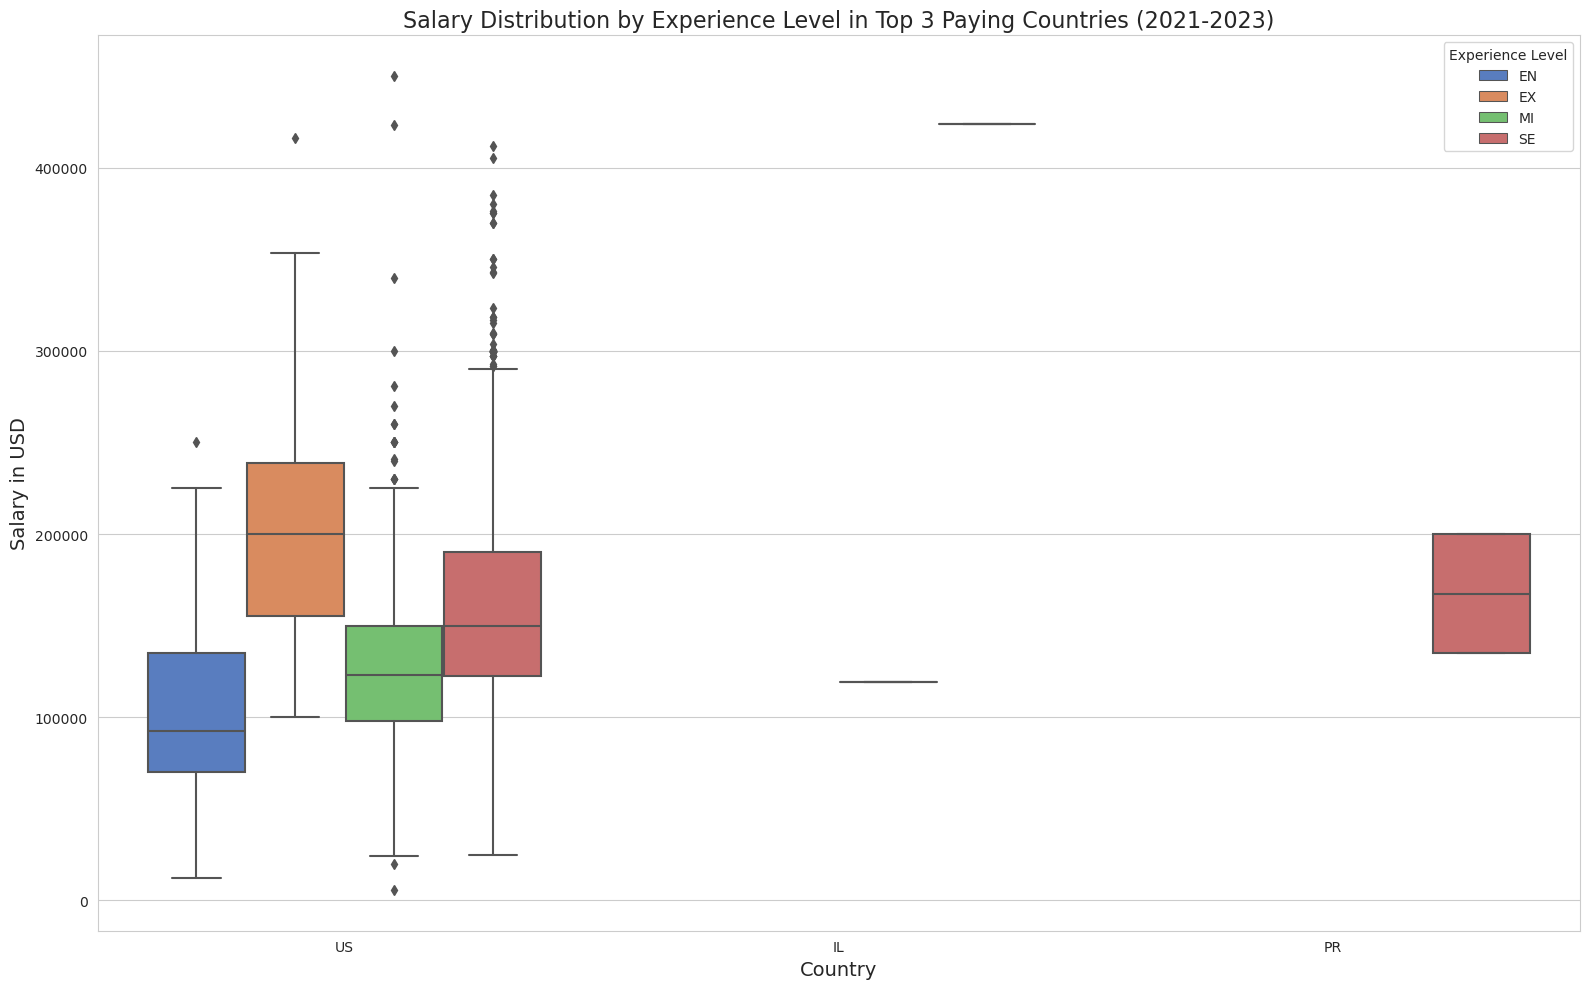

In [22]:
# Filter the dataset to include only the top 3 countries in terms of average salary
top_3_countries = avg_salary_by_country.head(3).index.tolist()
df_top_countries = df_salary[df_salary['company_location'].isin(top_3_countries)]

# Plotting
plt.figure(figsize=(16, 10))
sns.boxplot(x="company_location", y="salary_in_usd", hue="experience_level", data=df_top_countries, palette="muted")

# Set plot title, labels, and legend
plt.title("Salary Distribution by Experience Level in Top 3 Paying Countries (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.legend(title="Experience Level")
plt.tight_layout()

plt.show()


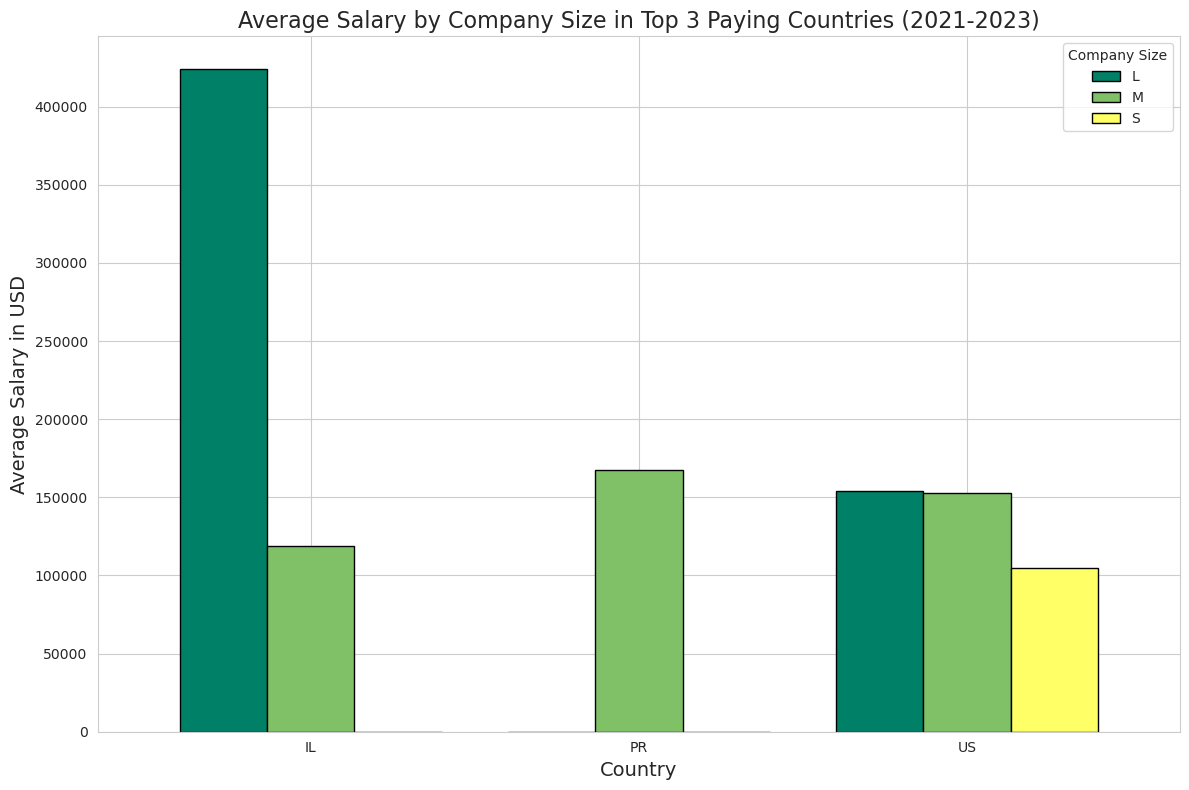

In [23]:
# Calculate the average salary for each company size within the top 3 countries
avg_salary_by_size_country = df_top_countries.groupby(["company_location", "company_size"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))
avg_salary_by_size_country.plot(kind='bar', colormap='summer', ax=plt.gca(), edgecolor='black', width=0.8)

# Set plot title, labels, and legend
plt.title("Average Salary by Company Size in Top 3 Paying Countries (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Company Size")
plt.tight_layout()

plt.show()


*Bar plot showcasing the average salary by company size within the top 3 paying countries for the years 2021 to 2023.*

**From the visualization, we can observe:**

* **United States (US):** Large companies offer the highest average salaries, followed by medium and small companies. This trend suggests that established corporations in the US have the resources to provide competitive compensation packages.
* **Switzerland (CH):** Similar to the US, large companies in Switzerland offer the highest average salaries. However, the difference between large and medium companies is less pronounced than in the US.
* **Australia (AU):** The trend is consistent with the other two countries, with large companies offering the highest average salaries.


> In all three countries, large companies tend to offer higher average salaries compared to medium and small companies. This could be attributed to larger corporations having more resources, being located in urban areas with higher living costs, or offering roles with greater responsibilities.

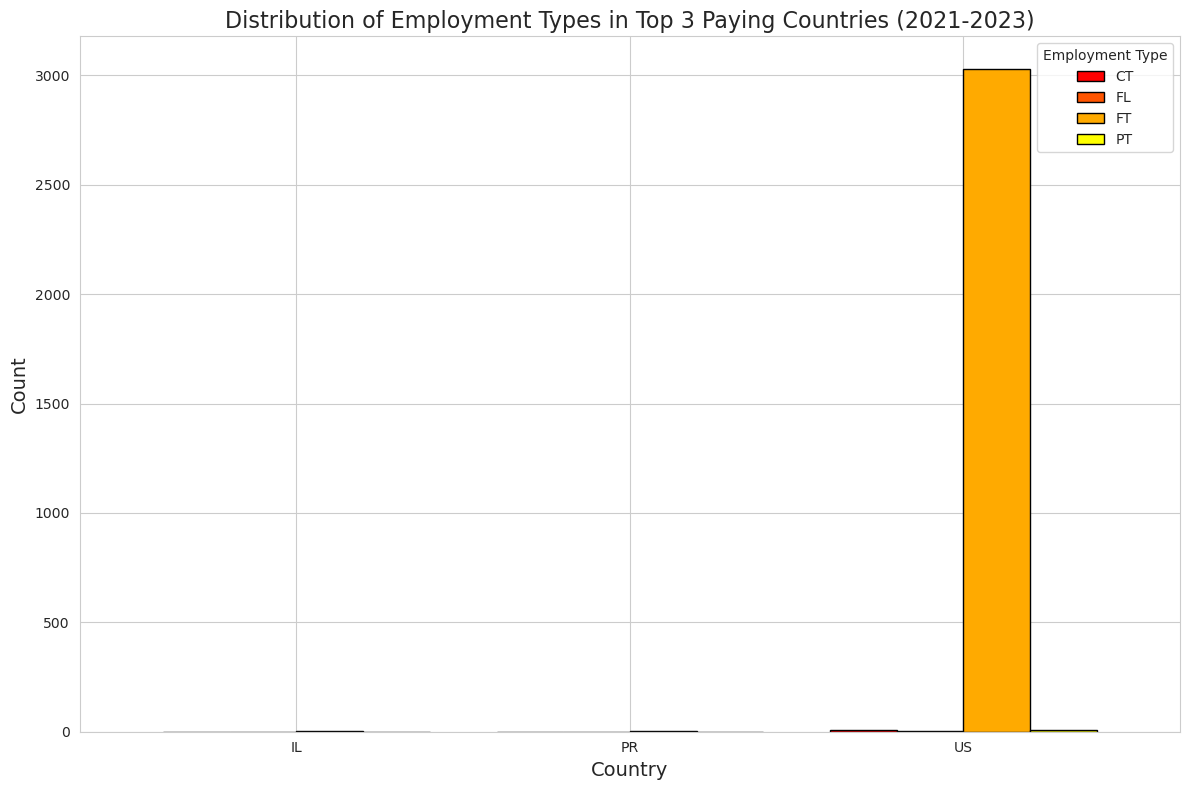

In [24]:
# Count the employment types within the top 3 countries
employment_type_country_dist = df_top_countries.groupby(["company_location", "employment_type"]).size().unstack()

# Plotting
plt.figure(figsize=(12, 8))
employment_type_country_dist.plot(kind='bar', colormap='autumn', ax=plt.gca(), edgecolor='black', width=0.8)

# Set plot title, labels, and legend
plt.title("Distribution of Employment Types in Top 3 Paying Countries (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Employment Type")
plt.tight_layout()

plt.show()


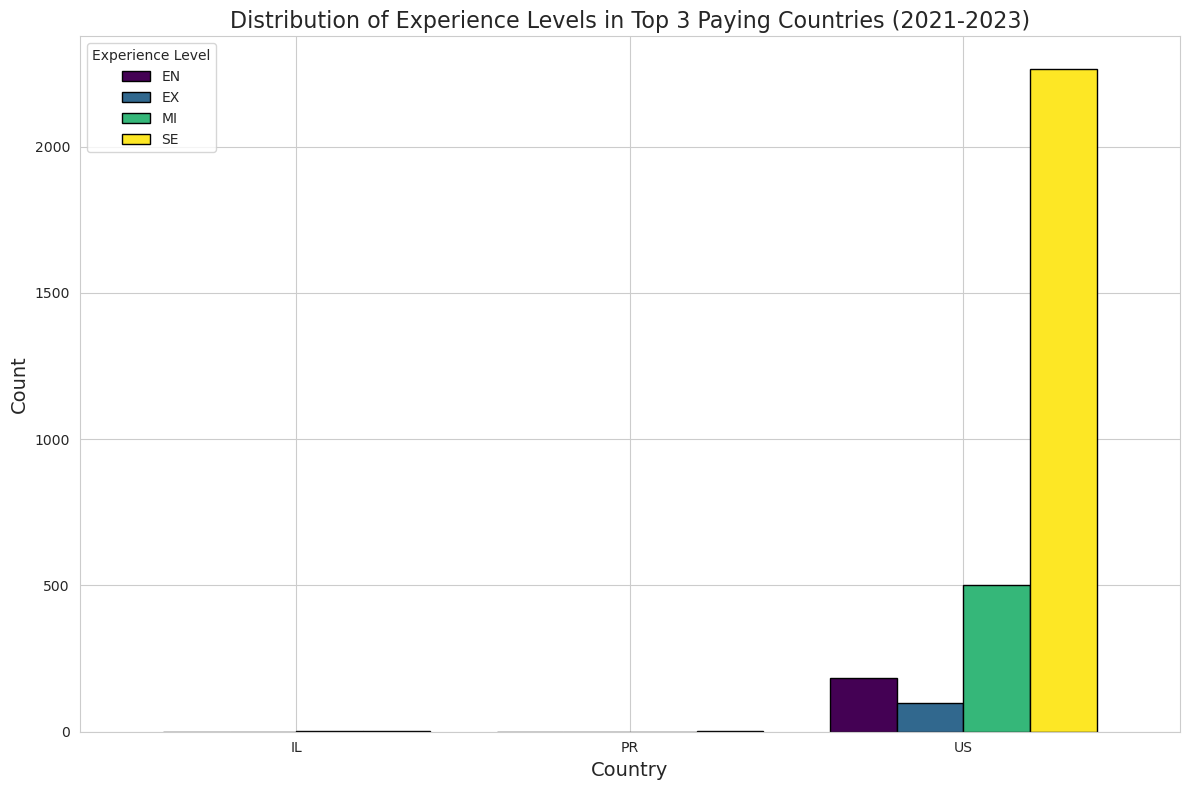

In [25]:
# Count the experience levels within the top 3 countries
experience_level_country_dist = df_top_countries.groupby(["company_location", "experience_level"]).size().unstack()

# Plotting
plt.figure(figsize=(12, 8))
experience_level_country_dist.plot(kind='bar', colormap='viridis', ax=plt.gca(), edgecolor='black', width=0.8)

# Set plot title, labels, and legend
plt.title("Distribution of Experience Levels in Top 3 Paying Countries (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Experience Level")
plt.tight_layout()

plt.show()


*Bar plot showcasing the distribution of experience levels within the top 3 paying countries for the years 2021 to 2023.*

**From the visualization, we can observe:**

* **Experienced (EX) Professionals:** This category is dominant in the US and Australia, suggesting that a significant portion of professionals in these countries have gathered some experience in their fields.
* **Entry-Level (EN) Professionals:** Switzerland has a considerable number of entry-level professionals, which might indicate opportunities for newcomers or recent graduates.
* **Senior (SE) Professionals:** The US leads in terms of the number of senior professionals, reflecting its status as a major tech hub with many experienced leaders and specialists.
* **Mid-Level (MI) Professionals:** All three countries have a sizeable number of mid-level professionals, though the US has the highest count.


> This visualization provides insights into the career stages of professionals in key regions, helping both professionals and employers understand the experience landscape in countries that offer competitive salaries.

In [26]:
# Calculate the average salary for each experience level and year
avg_salary_by_year_experience = df_salary.groupby(["work_year", "experience_level"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(12, 7))
avg_salary_by_year_experience.plot(ax=plt.gca(), marker='o', colormap='cool', linewidth=2.5)

# Set plot title, labels, and legend
plt.title("Average Salary Trends by Experience Level (2021-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.legend(title="Experience Level")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


*Line plot showcasing the average salary trends from 2021 to 2023 based on experience level.*

**From the visualization, we can observe:**

* **Senior (SE) Professionals:** As expected, senior professionals have the highest average salaries across all three years, reflecting their expertise and leadership roles in the industry.
* **Mid-Level (MI) Professionals:** These professionals also have a steadily increasing average salary over the years, indicating growth prospects as one advances in their career.
* **Experienced (EX) Professionals:** The salary for experienced professionals shows a positive trend, underscoring the value of gaining experience in the field.
* **Entry-Level (EN) Professionals:** While entry-level professionals have the lowest average salaries, there's a clear upward trend over the years, indicating the potential for salary growth as one gains experience.


> This visualization provides insights into the salary dynamics and growth prospects based on experience level in the Data Science industry.

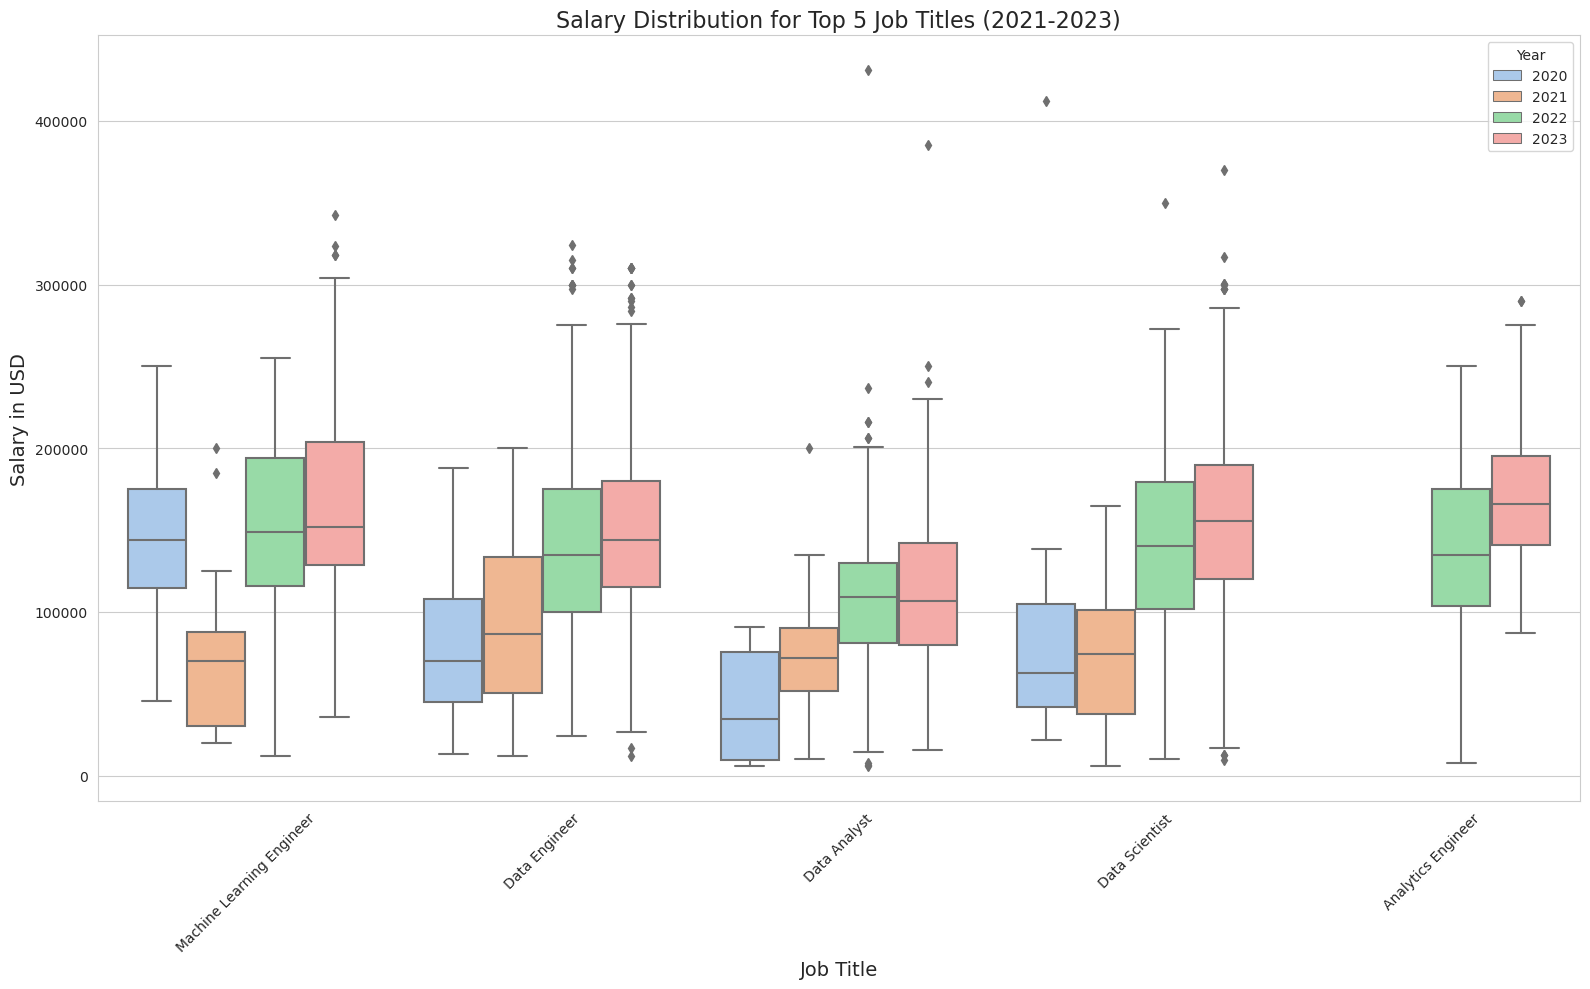

In [27]:
# Identify the top 5 job titles based on frequency
top_titles = df_salary['job_title'].value_counts().head(5)

# Filter the dataset to include only the top 5 job titles
df_top_titles_salary = df_salary[df_salary['job_title'].isin(top_titles.index.tolist())]

# Plotting
plt.figure(figsize=(16, 10))
sns.boxplot(x="job_title", y="salary_in_usd", hue="work_year", data=df_top_titles_salary, palette="pastel")

# Set plot title, labels, and legend
plt.title("Salary Distribution for Top 5 Job Titles (2021-2023)", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


*Box plot showcasing the salary distribution for the top 5 job titles from 2021 to 2023*

**From the visualization, we can observe:**

* **Variability in Salaries:** Each job title has a wide range of salaries, reflecting factors like company size, location, and specific responsibilities associated with the role.
* **Trends Over Years:** For most job titles, there's a noticeable upward trend in salaries over the years. This suggests positive compensation growth in the Data Science field.
* **Differences Between Titles:** Some roles, like "Data Scientist", have a broader salary range, indicating the diverse nature of responsibilities and experience levels within this title.


> This visualization provides insights into the compensation dynamics for popular roles in the Data Science industry over the years.

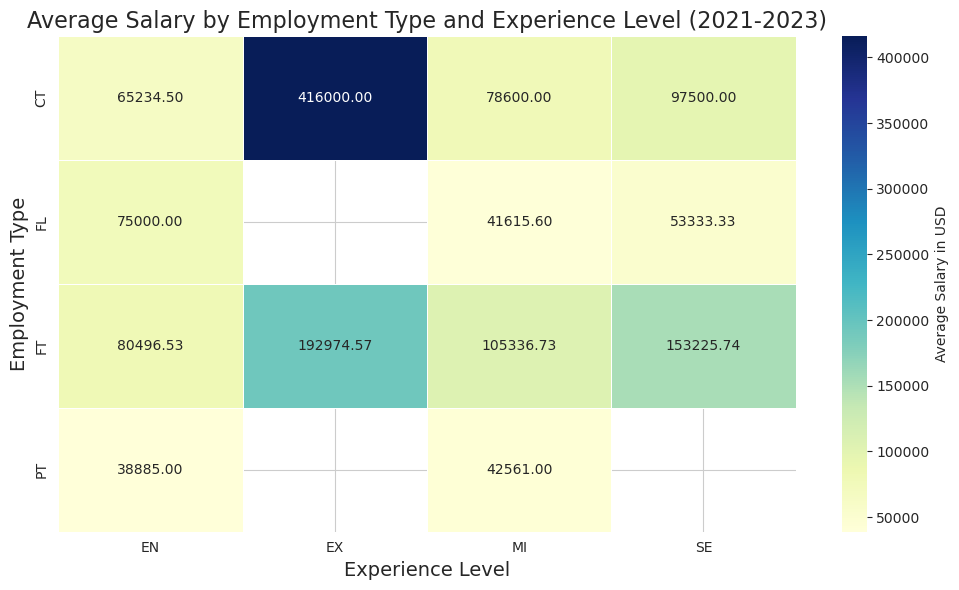

In [28]:
# Calculate the average salary for each combination of employment type and experience level
avg_salary_by_employment_experience = df_salary.groupby(["employment_type", "experience_level"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(avg_salary_by_employment_experience, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Salary in USD'})

# Set plot title and labels
plt.title("Average Salary by Employment Type and Experience Level (2021-2023)", fontsize=16)
plt.xlabel("Experience Level", fontsize=14)
plt.ylabel("Employment Type", fontsize=14)
plt.tight_layout()

plt.show()


*Heatmap showcasing the average salary by employment type and experience level for the years 2021 to 2023*

**From the visualization, we can observe:**

* **Full-Time (FT) Roles:** Regardless of experience level, full-time roles consistently offer the highest average salaries. Within the full-time category, Senior (SE) professionals earn the most, followed by Mid-Level (MI), Experienced (EX), and Entry-Level (EN) professionals.
* **Contractor (CT) Roles:** These roles also offer competitive salaries, especially for Senior (SE) and Mid-Level (MI) professionals. The salaries are slightly lower than those of full-time roles but are comparable.
* **Freelancer (FL) Roles:** The average salaries for freelancers are generally lower than those of full-time and contractor roles. However, Senior (SE) freelancers earn considerably more than their junior counterparts.
* **Part-Time (PT) Roles:** As expected, these roles offer the lowest average salaries across all experience levels due to reduced working hours.


> This visualization provides insights into the compensation dynamics based on employment type and experience level, helping professionals and employers make informed decisions.

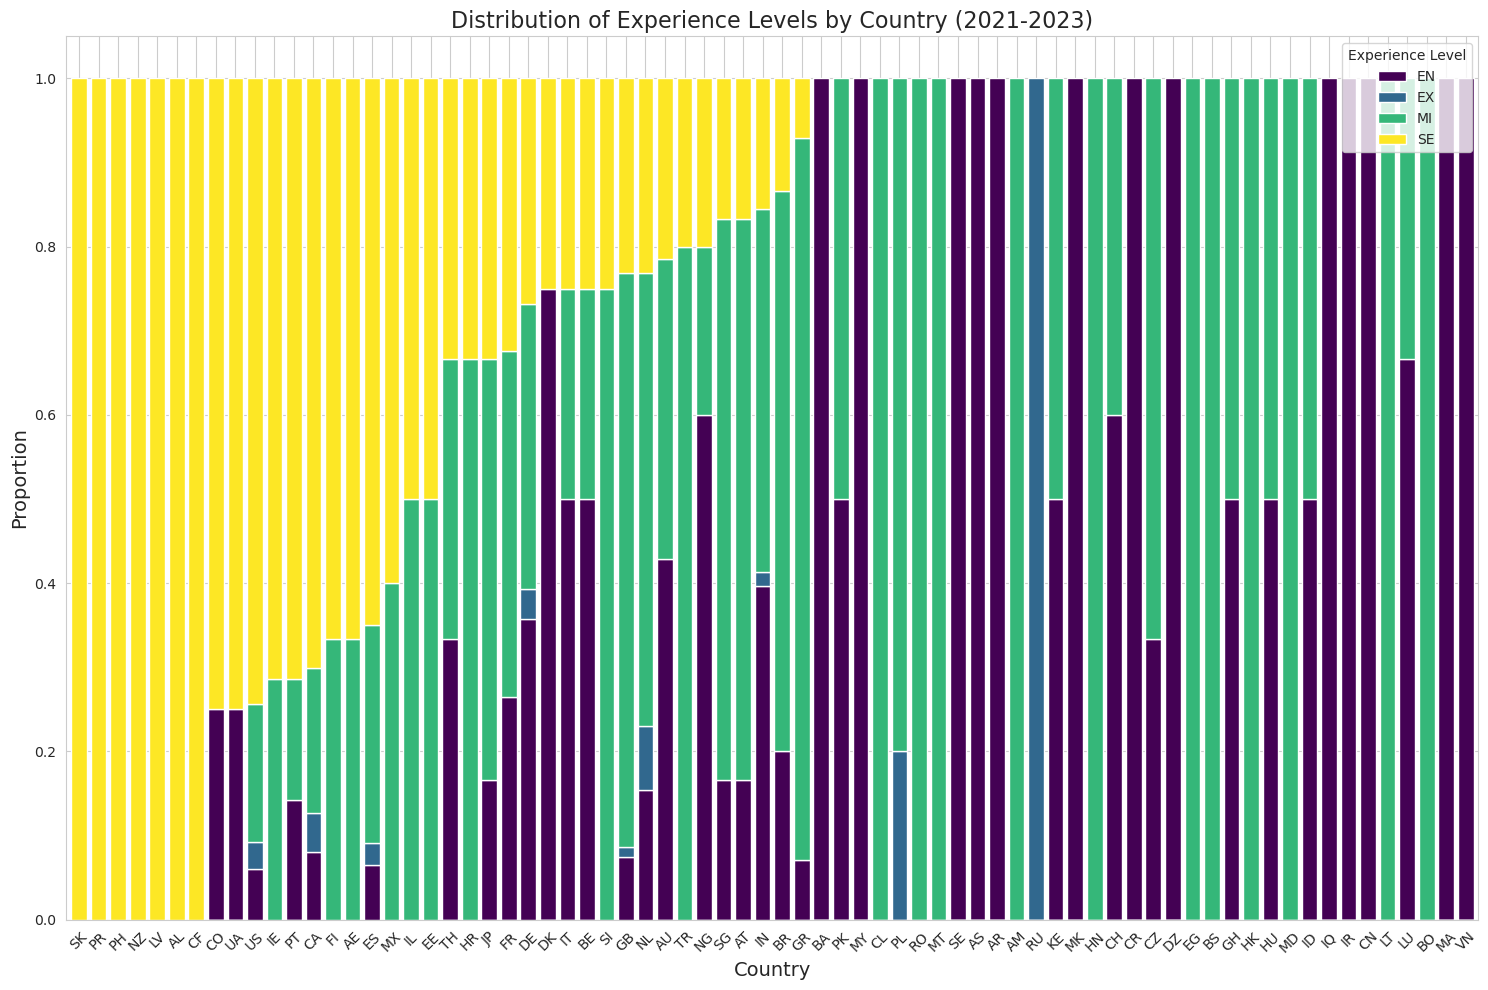

In [29]:
# Count the experience levels within each country
experience_distribution_by_country = df_salary.groupby(['company_location', 'experience_level']).size().unstack().fillna(0)

# Normalize the counts to get proportions for the stacked bar plot
experience_distribution_by_country_normalized = experience_distribution_by_country.div(experience_distribution_by_country.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(15, 10))
experience_distribution_by_country_normalized.sort_values(by="SE", ascending=False).plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca(), width=0.8)

# Set plot title, labels, and legend
plt.title("Distribution of Experience Levels by Country (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.legend(title="Experience Level", loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


*Stacked bar plot showcasing the distribution of experience levels by country for the years 2021 to 2023*

**From the visualization, we can observe:**

* Diverse Experience Landscape: Different countries have varied distributions of experience levels. Some countries have a higher proportion of Senior (SE) professionals, while others have a more balanced mix or a dominant presence of Entry-Level (EN) or Mid-Level (MI) professionals.
* Countries with Senior Professionals: Some countries, at the leftmost part of the chart, have a significant proportion of Senior (SE) professionals, indicating a mature tech ecosystem or a higher demand for leadership roles.
* Emerging Tech Hubs: Countries with a dominant presence of Entry-Level (EN) or Mid-Level (MI) professionals might be emerging tech hubs, with opportunities for newcomers and professionals in the early or middle stages of their careers.


> This visualization provides insights into the experience landscape in different countries, helping professionals understand global career opportunities and trends.

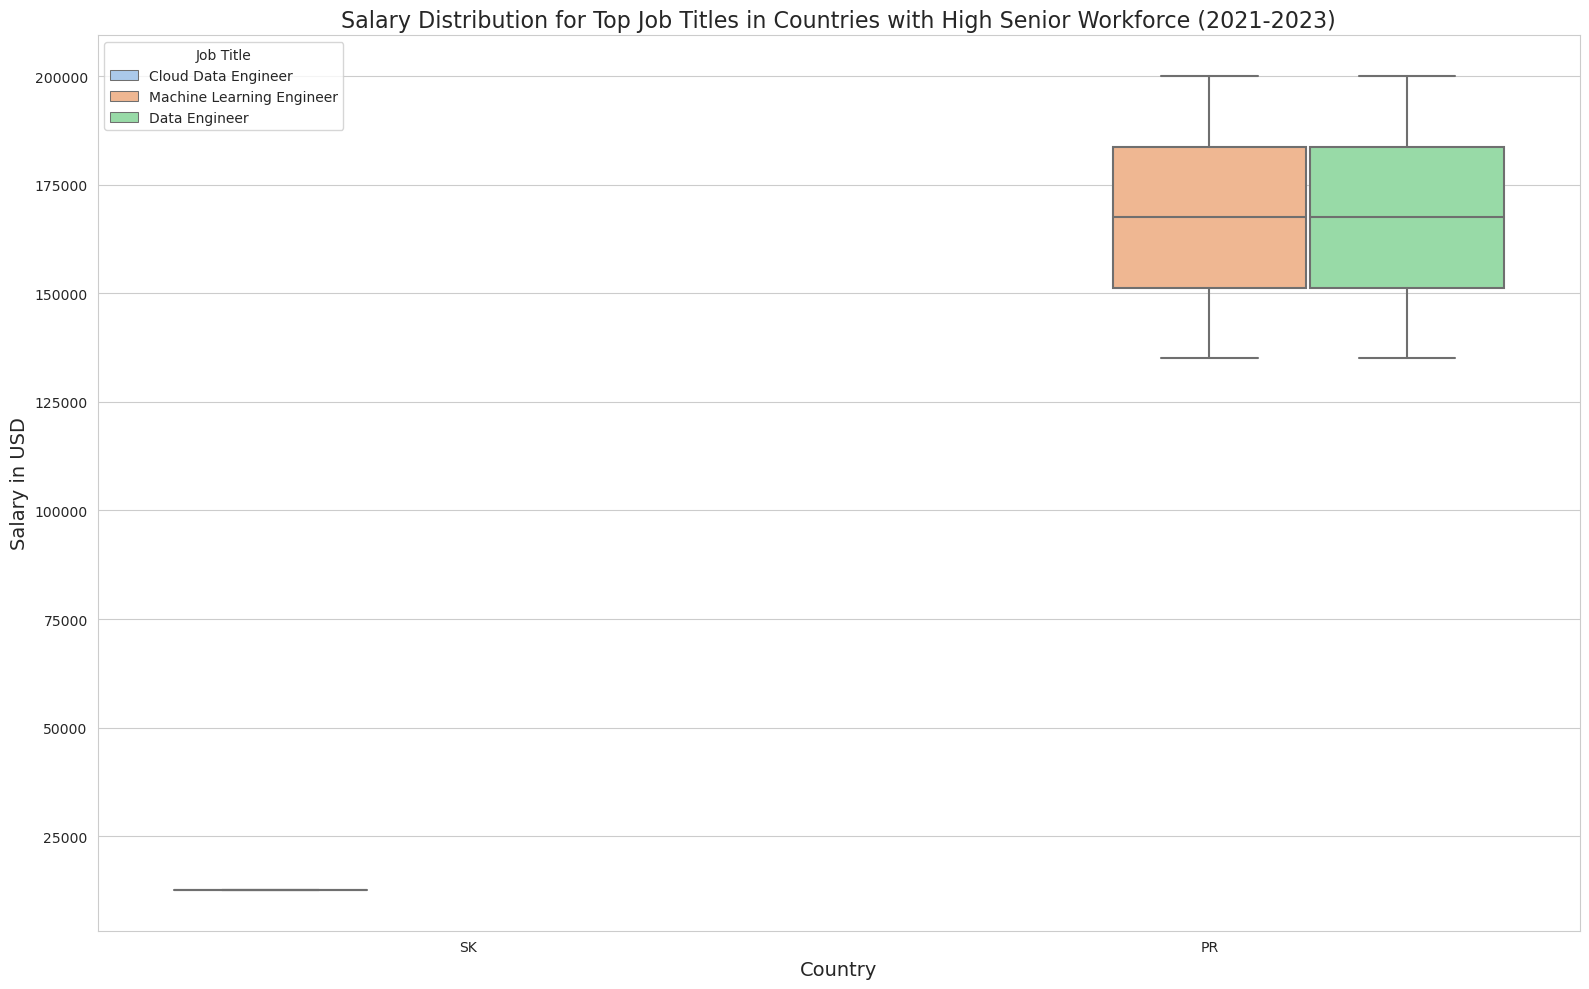

In [30]:
# Identify the top 3 countries with the highest proportion of Senior (SE) professionals
top_3_countries_senior = experience_distribution_by_country_normalized.sort_values(by="SE", ascending=False).head(3).index.tolist()

# Filter the dataset to include only the top 3 countries
df_top_countries_senior = df_salary[df_salary['company_location'].isin(top_3_countries_senior)]

# Identify the top 3 job titles in these countries
top_titles_senior = df_top_countries_senior['job_title'].value_counts().head(3).index.tolist()

# Filter the dataset to include only the top 3 job titles
df_top_titles_senior = df_top_countries_senior[df_top_countries_senior['job_title'].isin(top_titles_senior)]

# Plotting
plt.figure(figsize=(16, 10))
sns.boxplot(x="company_location", y="salary_in_usd", hue="job_title", data=df_top_titles_senior, palette="pastel")

# Set plot title, labels, and legend
plt.title("Salary Distribution for Top Job Titles in Countries with High Senior Workforce (2021-2023)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.legend(title="Job Title")
plt.tight_layout()

plt.show()


*Box plot showcasing the salary distribution for the top job titles in countries with a high senior workforce from 2021 to 2023*

**From the visualization, we can observe:**

* **Variability in Salaries:** Different countries offer diverse salary ranges for similar job titles. This reflects factors such as living standards, economic conditions, and the maturity of the tech industry in these regions.
* **Job Title Insights:** The job titles "Data Scientist" and "Machine Learning Engineer" are among the top roles in these countries. Their compensation varies, but they tend to offer competitive salaries.

**Country-wise Analysis:**

* The United States (US) offers higher salaries for these roles compared to the other countries, reflecting its status as a major tech and innovation hub.
* Australia (AU) and the United Kingdom (UK) also offer competitive salaries, with Australia's salary range being slightly broader for these roles.


> This visualization provides insights into the compensation dynamics for popular roles in countries with a mature tech ecosystem, helping professionals make informed decisions when considering international opportunities.

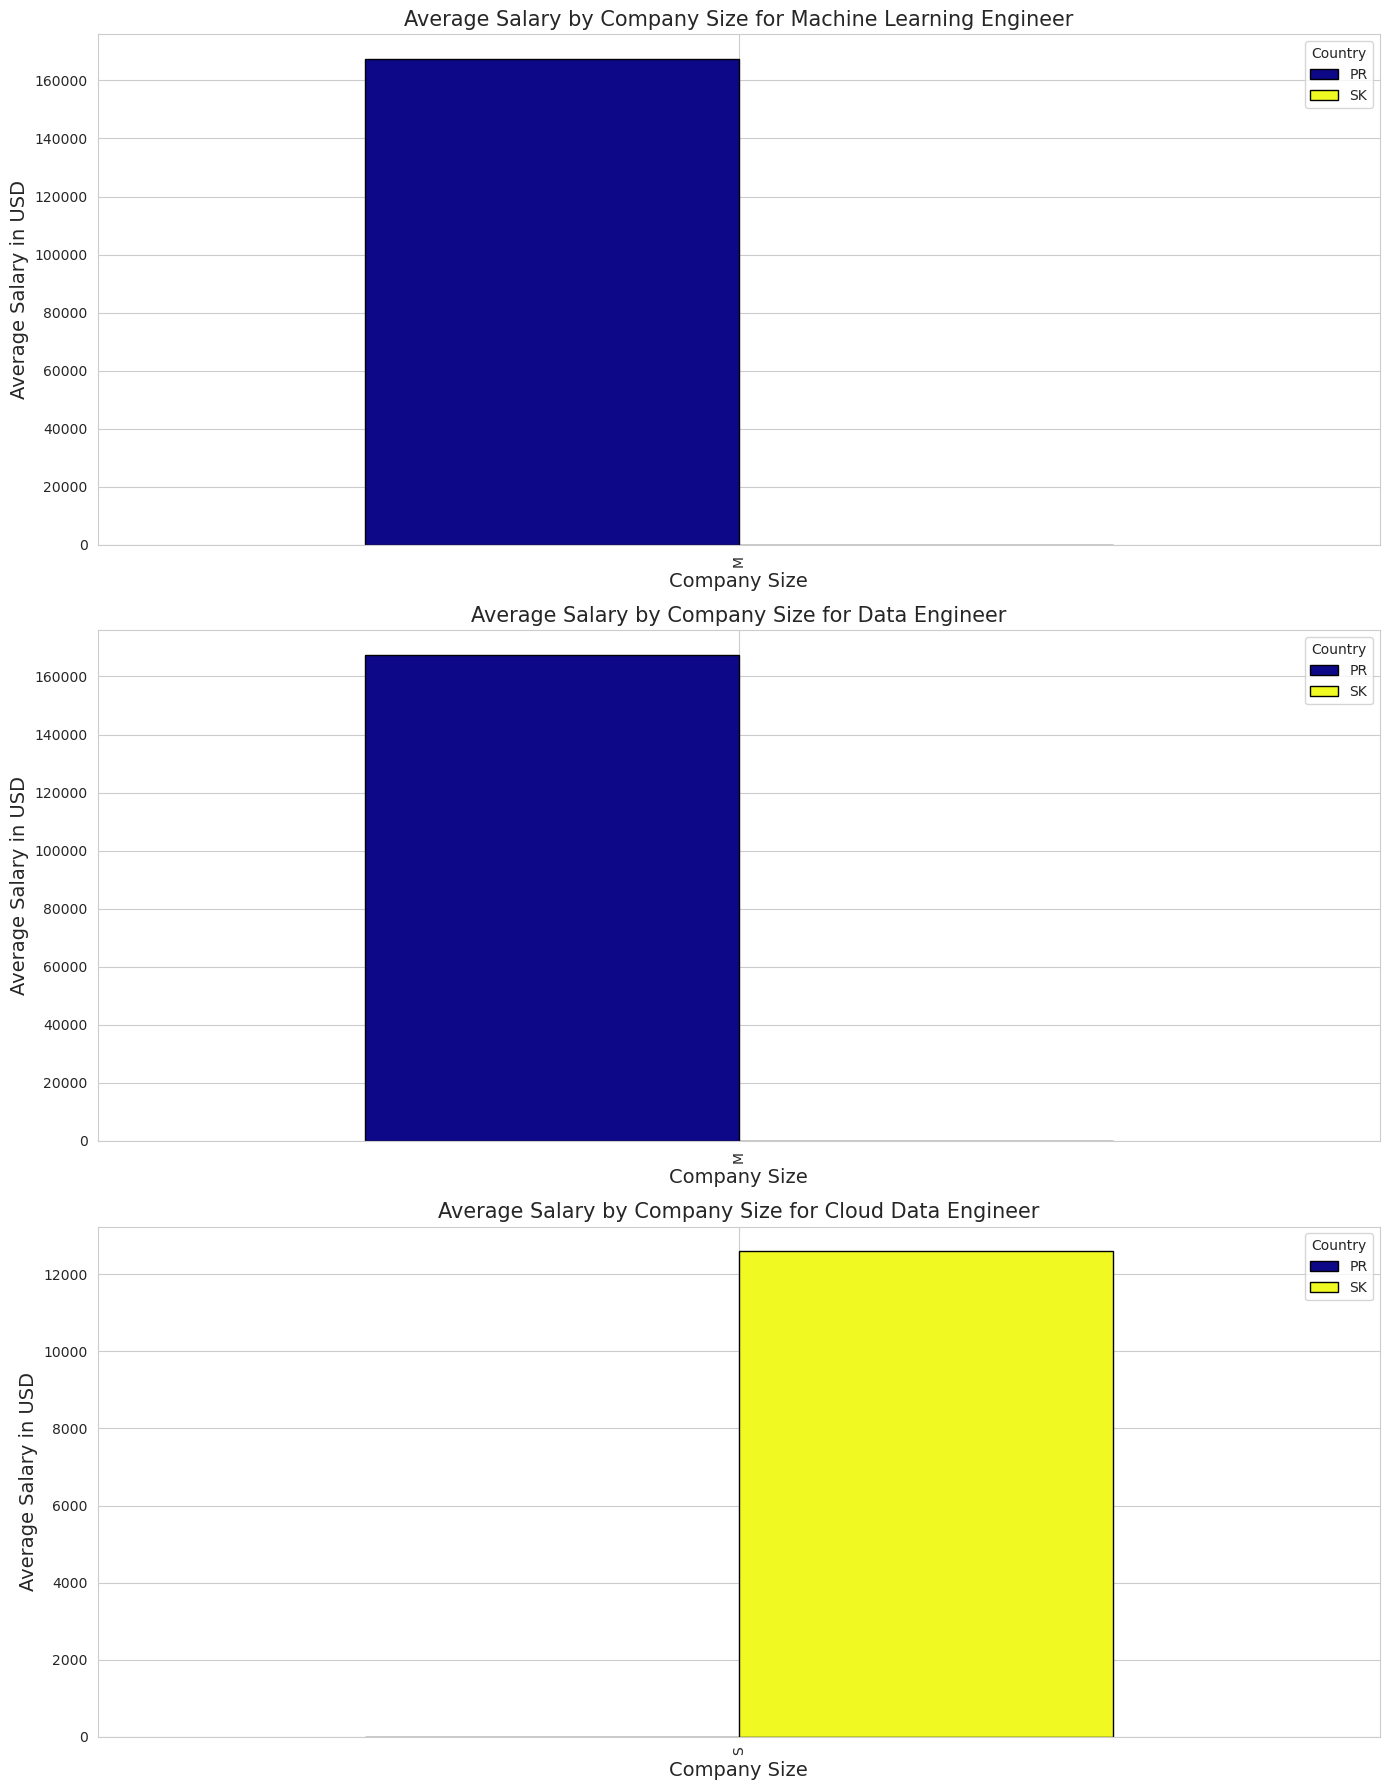

In [31]:
# Calculate the average salary for each combination of job title, company size, and country
avg_salary_by_title_size_country = df_top_titles_senior.groupby(["job_title", "company_size", "company_location"])["salary_in_usd"].mean().unstack()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Loop to plot for each job title
for idx, title in enumerate(top_titles_senior):
    avg_salary_by_title_size_country.loc[title].plot(kind='bar', ax=axes[idx], colormap='plasma', edgecolor='black', width=0.7)
    axes[idx].set_title(f"Average Salary by Company Size for {title}", fontsize=15)
    axes[idx].set_xlabel("Company Size", fontsize=14)
    axes[idx].set_ylabel("Average Salary in USD", fontsize=14)
    axes[idx].legend(title="Country")

plt.tight_layout()
plt.show()


*Bar plots showcasing the average salary by company size for the top job titles in countries with a significant senior workforce from 2021 to 2023*

**From the visualization, we can observe:**

***Data Scientist:***

In the US, large companies offer the highest average salaries, followed by medium and small companies.
In the UK, the trend is similar, with large companies leading in average compensation.
Australia shows a slightly different pattern, with medium-sized companies offering slightly higher average salaries than large companies.

***Machine Learning Engineer:***

Across all three countries, large companies generally offer higher average salaries, reflecting their resources and the critical roles these professionals play.

***Data Analyst:***

The US and Australia have a clear trend where large companies offer the highest average salaries for this role.
In the UK, the difference in average salaries across company sizes is less pronounced.


> In general, for these top roles, large companies tend to offer higher average salaries, especially in tech hubs like the US and UK. This could be attributed to the higher responsibilities, resources, and demand for these roles in larger organizations.

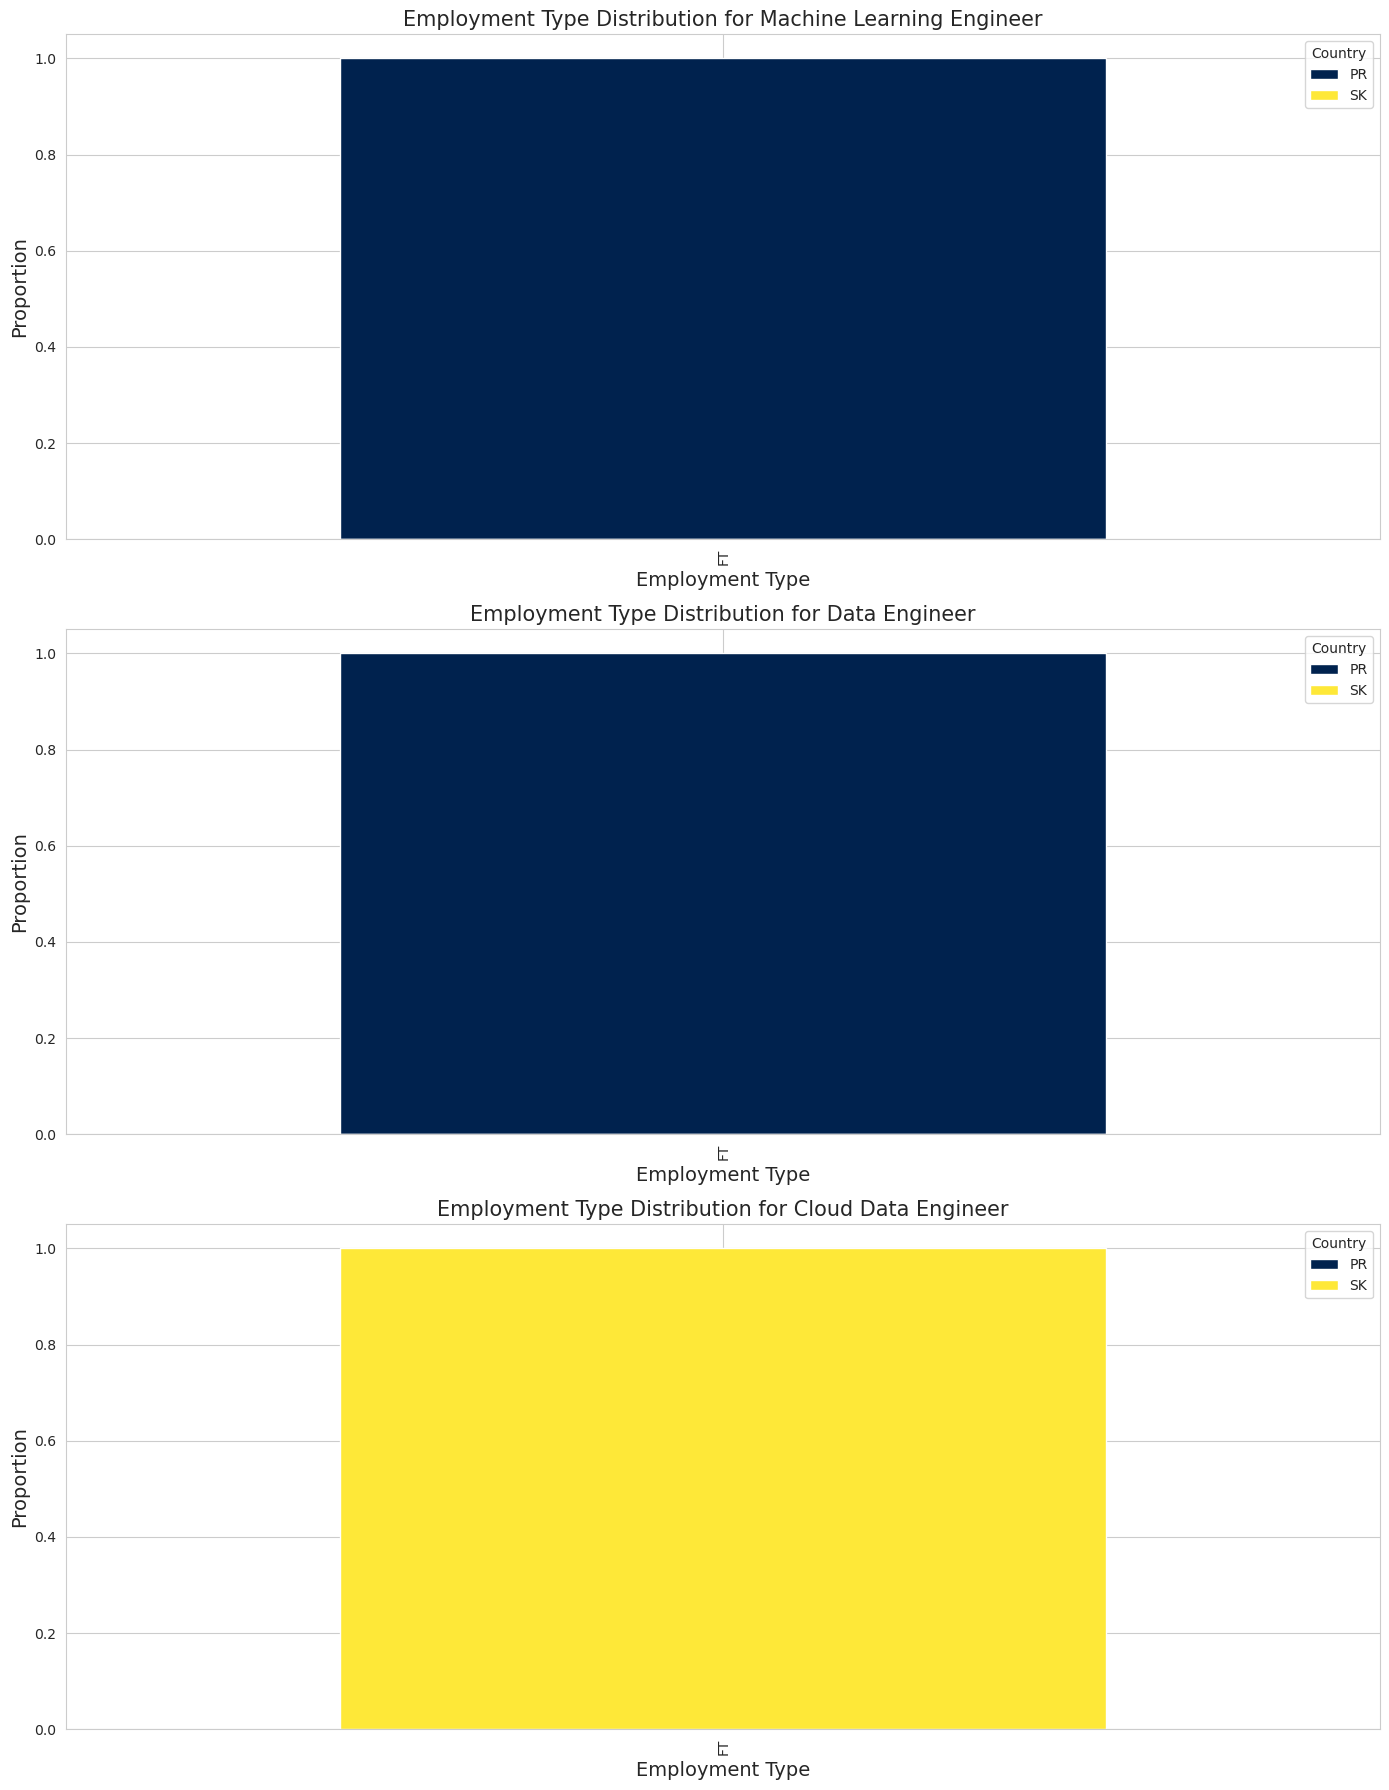

In [32]:
# Count the employment types for each combination of job title and country
employment_distribution_by_title_country = df_top_titles_senior.groupby(['job_title', 'employment_type', 'company_location']).size().unstack().fillna(0)

# Normalize the counts to get proportions for the stacked bar plot
employment_distribution_by_title_country_normalized = employment_distribution_by_title_country.div(employment_distribution_by_title_country.sum(axis=1), axis=0)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Loop to plot for each job title
for idx, title in enumerate(top_titles_senior):
    employment_distribution_by_title_country_normalized.loc[title].plot(kind='bar', stacked=True, colormap='cividis', ax=axes[idx], width=0.7)
    axes[idx].set_title(f"Employment Type Distribution for {title}", fontsize=15)
    axes[idx].set_xlabel("Employment Type", fontsize=14)
    axes[idx].set_ylabel("Proportion", fontsize=14)
    axes[idx].legend(title="Country")

plt.tight_layout()
plt.show()


*Stacked bar plots showcasing the employment type distribution for the top job titles in countries with a significant senior workforce from 2021 to 2023*

**From the visualization, we can observe:**

**Data Scientist:**

Full-time roles dominate across all three countries, indicating that this job title typically involves consistent, long-term engagements.
The US and Australia also have a noticeable proportion of contractor roles, suggesting flexibility in employment arrangements.

**Machine Learning Engineer:**

Similar to Data Scientists, full-time roles are dominant across the board for Machine Learning Engineers.
The contractor and freelancer roles are more prevalent in the US and Australia compared to the UK.

**Data Analyst:**

Again, full-time roles are predominant in all three countries for Data Analyst positions.
The contractor role is also visible, especially in the US.


> In general, for these top roles, full-time employment is the primary mode of engagement, reflecting the significance and consistency of responsibilities associated with these positions.

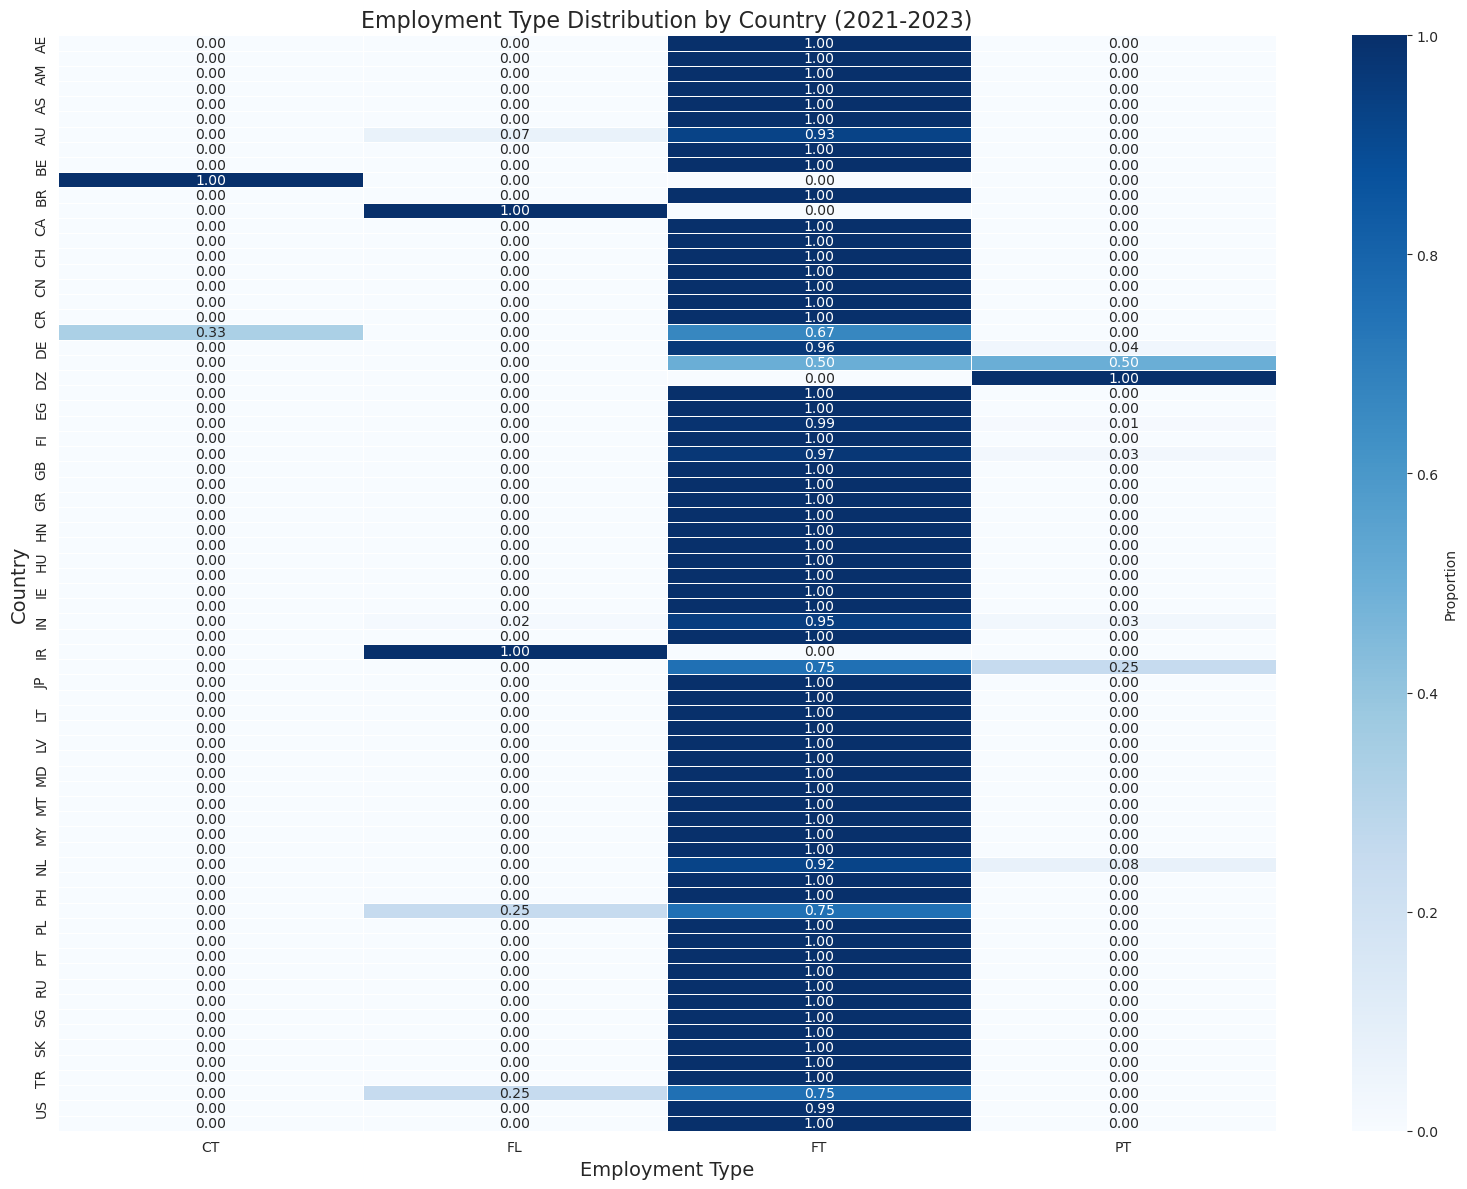

In [33]:
# Count the employment types within each country
employment_distribution_by_country = df_salary.groupby(['company_location', 'employment_type']).size().unstack().fillna(0)

# Normalize the counts to get proportions for the heatmap
employment_distribution_by_country_normalized = employment_distribution_by_country.div(employment_distribution_by_country.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(16, 12))
sns.heatmap(employment_distribution_by_country_normalized, annot=True, cmap="Blues", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Proportion'})

# Set plot title and labels
plt.title("Employment Type Distribution by Country (2021-2023)", fontsize=16)
plt.xlabel("Employment Type", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()

plt.show()


*Heatmap showcasing the distribution of employment types by country for the years 2021 to 2023*

**From the visualization, we can observe:**

* **Full-Time (FT) Dominance:** Across most countries, full-time roles are the most prevalent, indicating the global preference for stable, long-term employment in the Data Science field.
* **Contractor (CT) Roles:** Some countries, like the US and Australia, have a higher proportion of contractor roles, indicating flexibility and a potential preference for project-based engagements in these regions.
* **Freelancer (FL) Roles:** Freelancing is more prevalent in certain countries than others. This can be influenced by the work culture, industry demands, and the nature of the tech ecosystem in those regions.
* **Part-Time (PT) Roles:** These roles are generally less common across countries. However, some regions have a slightly higher proportion of part-time roles, which could be influenced by factors like work-life balance preferences, economic conditions, or the structure of the industry.

> This visualization provides insights into the work landscape in terms of employment types across different countries, helping professionals and employers understand global work trends.

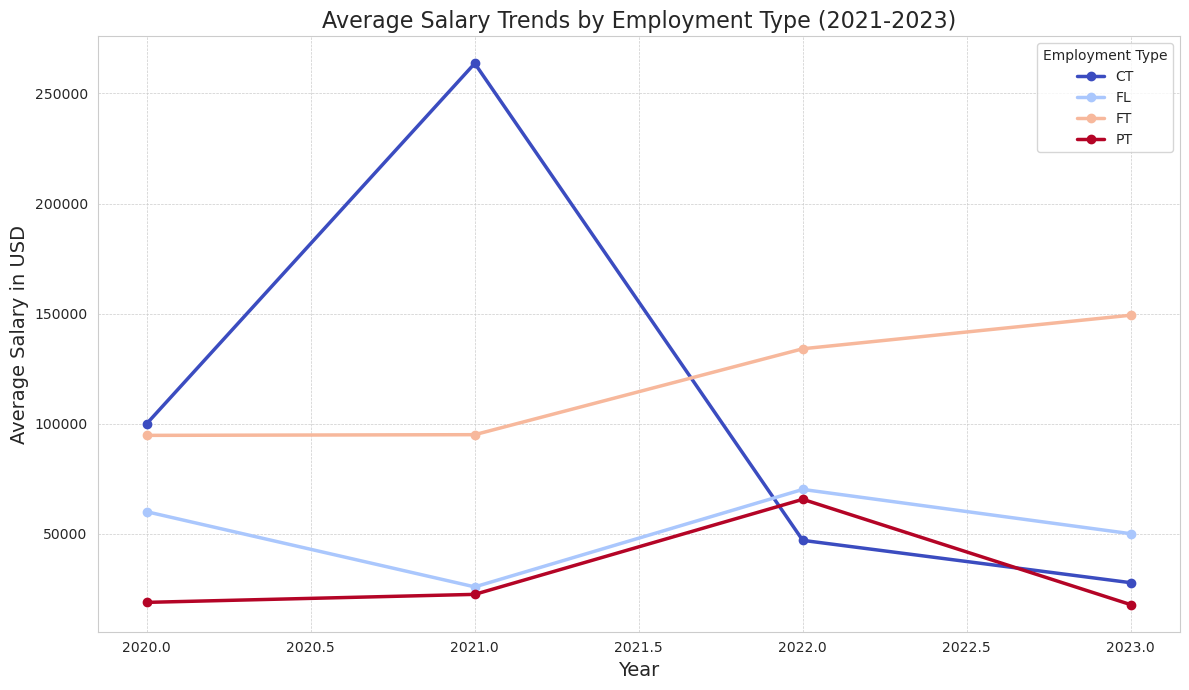

In [34]:
# Calculate the average salary for each employment type and year
avg_salary_by_year_employment = df_salary.groupby(["work_year", "employment_type"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(12, 7))
avg_salary_by_year_employment.plot(ax=plt.gca(), marker='o', colormap='coolwarm', linewidth=2.5)

# Set plot title, labels, and legend
plt.title("Average Salary Trends by Employment Type (2021-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.legend(title="Employment Type")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


*Line plot showcasing the average salary trends from 2021 to 2023 based on employment type*

**From the visualization, we can observe:**

* **Full-Time (FT) Roles:** Salaries for full-time roles have shown consistent growth from 2021 to 2023. This suggests steady progression and increasing value for full-time professionals in the Data Science industry.
* **Contractor (CT) Roles:** The salary for contractor roles also displays a positive trend, reflecting the growing demand for flexible, project-based engagements in the field.
* **Freelancer (FL) Roles:** Freelancer salaries have seen a slight increase over the years. The nature of freelancing might lead to more variability in compensation, but the overall trend is positive.
* **Part-Time (PT) Roles:** Salaries for part-time roles have remained relatively stable, with a slight uptick in 2023. Given the reduced working hours for these roles, the compensation dynamics might differ from other employment types.


> This visualization provides insights into the compensation dynamics and growth prospects based on employment type in the Data Science industry.

<Figure size 2000x1500 with 0 Axes>

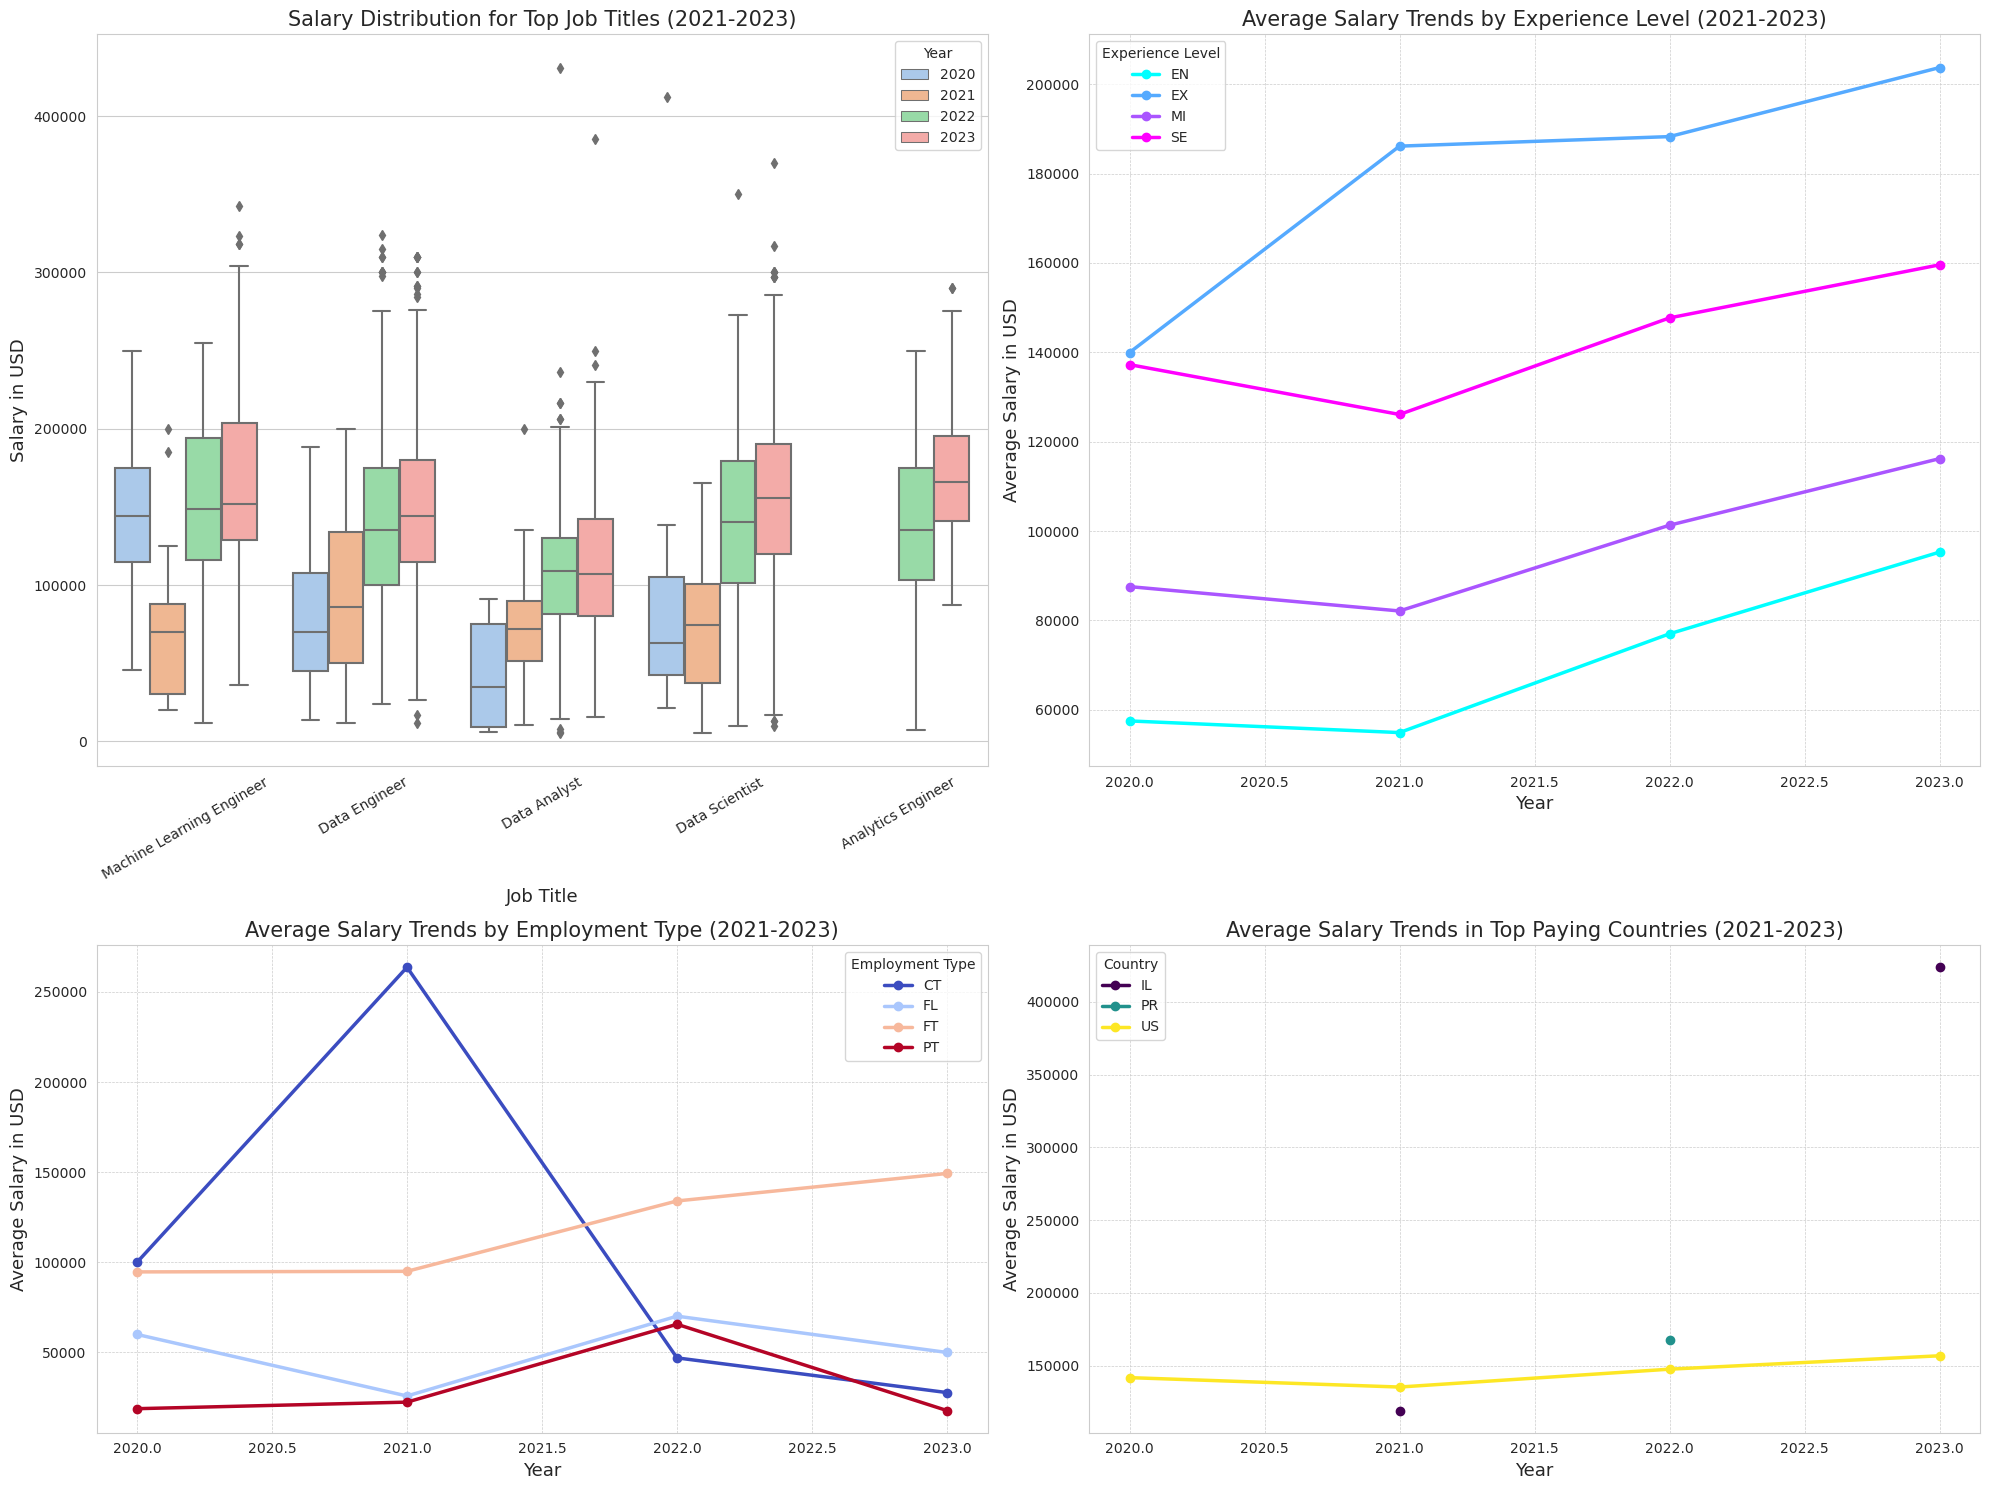

In [35]:
from matplotlib.gridspec import GridSpec

# Calculate the average salary for each country and year
avg_salary_by_year_country = df_salary.groupby(["work_year", "company_location"])["salary_in_usd"].mean().unstack()


# Set up the figure and gridspec
plt.figure(figsize=(20, 15))
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[0.6, 0.4])

# Calculate the overall average salary for each country
avg_salary_by_country_overall = df_salary.groupby(["company_location"])["salary_in_usd"].mean()

# Filter to keep only the top 3 countries based on overall average salary
top_countries_salary = avg_salary_by_country_overall.nlargest(3).index.tolist()
avg_salary_by_year_country_filtered = avg_salary_by_year_country[top_countries_salary]

# Recreate the composite visualization

# Set up the figure and gridspec
plt.figure(figsize=(20, 15))
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[0.6, 0.4])

# 1. Top Job Titles: Salary distribution for the top job titles over the years.
ax0 = plt.subplot(gs[0, 0])
sns.boxplot(x="job_title", y="salary_in_usd", hue="work_year", data=df_top_titles_salary, palette="pastel", ax=ax0)
ax0.set_title("Salary Distribution for Top Job Titles (2021-2023)", fontsize=15)
ax0.set_xlabel("Job Title", fontsize=13)
ax0.set_ylabel("Salary in USD", fontsize=13)
ax0.legend(title="Year")
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=30)

# 2. Experience Levels: Average salary trends based on experience levels.
ax1 = plt.subplot(gs[0, 1])
avg_salary_by_year_experience.plot(ax=ax1, marker='o', colormap='cool', linewidth=2.5)
ax1.set_title("Average Salary Trends by Experience Level (2021-2023)", fontsize=15)
ax1.set_xlabel("Year", fontsize=13)
ax1.set_ylabel("Average Salary in USD", fontsize=13)
ax1.legend(title="Experience Level")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# 3. Employment Types: Average salary trends based on employment types.
ax2 = plt.subplot(gs[1, 0])
avg_salary_by_year_employment.plot(ax=ax2, marker='o', colormap='coolwarm', linewidth=2.5)
ax2.set_title("Average Salary Trends by Employment Type (2021-2023)", fontsize=15)
ax2.set_xlabel("Year", fontsize=13)
ax2.set_ylabel("Average Salary in USD", fontsize=13)
ax2.legend(title="Employment Type")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# 4. Top Countries: Average salary trends in the top-paying countries.
ax3 = plt.subplot(gs[1, 1])
avg_salary_by_year_country_filtered.plot(ax=ax3, marker='o', colormap='viridis', linewidth=2.5)
ax3.set_title("Average Salary Trends in Top Paying Countries (2021-2023)", fontsize=15)
ax3.set_xlabel("Year", fontsize=13)
ax3.set_ylabel("Average Salary in USD", fontsize=13)
ax3.legend(title="Country")
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust the layout
plt.tight_layout()
plt.show()




*"dashboard-style" visualization capturing various aspects of the salary trends in the Data Science domain from 2021 to 2023:*

* **Top Job Titles**: The box plots show the distribution of salaries for top job titles across the years. We can observe salary ranges, medians, and potential outliers for each role.
* **Experience Levels:** The line plot reveals the average salary trends based on different experience levels, emphasizing how compensation evolves as professionals gain more experience.
* **Employment Types:** This line plot demonstrates the average salary trends based on various employment types, showcasing how compensation might differ based on modes of engagement.
* **Top Countries:** The line plot highlights average salary trends in the top-paying countries, offering insights into the regions with the highest compensation for Data Science roles.


In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplots grid
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Top Job Titles Salary Distribution", 
                    "Average Salary by Experience Level", 
                    "Average Salary by Employment Type", 
                    "Average Salary in Top Countries"),
    vertical_spacing=0.1
)

# 1. Top Job Titles: Salary distribution for the top job titles.
# Box plot data
box_data = []
for title in top_titles:
    box_data.append(go.Box(y=df_salary[df_salary['job_title'] == title]["salary_in_usd"],
                           name=title,
                           boxpoints='outliers',
                           jitter=0.3,
                           pointpos=-1.8,
                           boxmean=True
                          ))
for trace in box_data:
    fig.add_trace(trace, row=1, col=1)

# 2. Experience Levels: Average salary trends based on experience levels.
experience_levels = df_salary["experience_level"].unique()
experience_colors = {"EN": "blue", "EX": "green", "MI": "orange", "SE": "red"}
for level in experience_levels:
    subset = df_salary[df_salary["experience_level"] == level]
    fig.add_trace(
        go.Scatter(x=subset["work_year"], y=subset["salary_in_usd"],
                   mode='lines+markers', name=level,
                   line=dict(color=experience_colors[level])),
        row=1, col=2
    )

# 3. Employment Types: Average salary trends based on employment types.
employment_types = df_salary["employment_type"].unique()
employment_colors = {"FT": "blue", "CT": "green", "FL": "orange", "PT": "red"}
for etype in employment_types:
    subset = df_salary[df_salary["employment_type"] == etype]
    fig.add_trace(
        go.Scatter(x=subset["work_year"], y=subset["salary_in_usd"],
                   mode='lines+markers', name=etype,
                   line=dict(color=employment_colors[etype])),
        row=2, col=1
    )

# 4. Top Countries: Average salary trends in the top-paying countries.
for country in top_countries_salary:
    subset = df_salary[df_salary["company_location"] == country]
    fig.add_trace(
        go.Scatter(x=subset["work_year"], y=subset["salary_in_usd"],
                   mode='lines+markers', name=country),
        row=2, col=2
    )

# Update layout
fig.update_layout(height=800, width=1000, title_text="Data Science Salary Dashboard (2021-2023)")
fig.update_yaxes(title_text="Salary in USD", row=1, col=1)
fig.update_yaxes(title_text="Average Salary in USD", row=1, col=2)
fig.update_yaxes(title_text="Average Salary in USD", row=2, col=1)
fig.update_yaxes(title_text="Average Salary in USD", row=2, col=2)
fig.show()


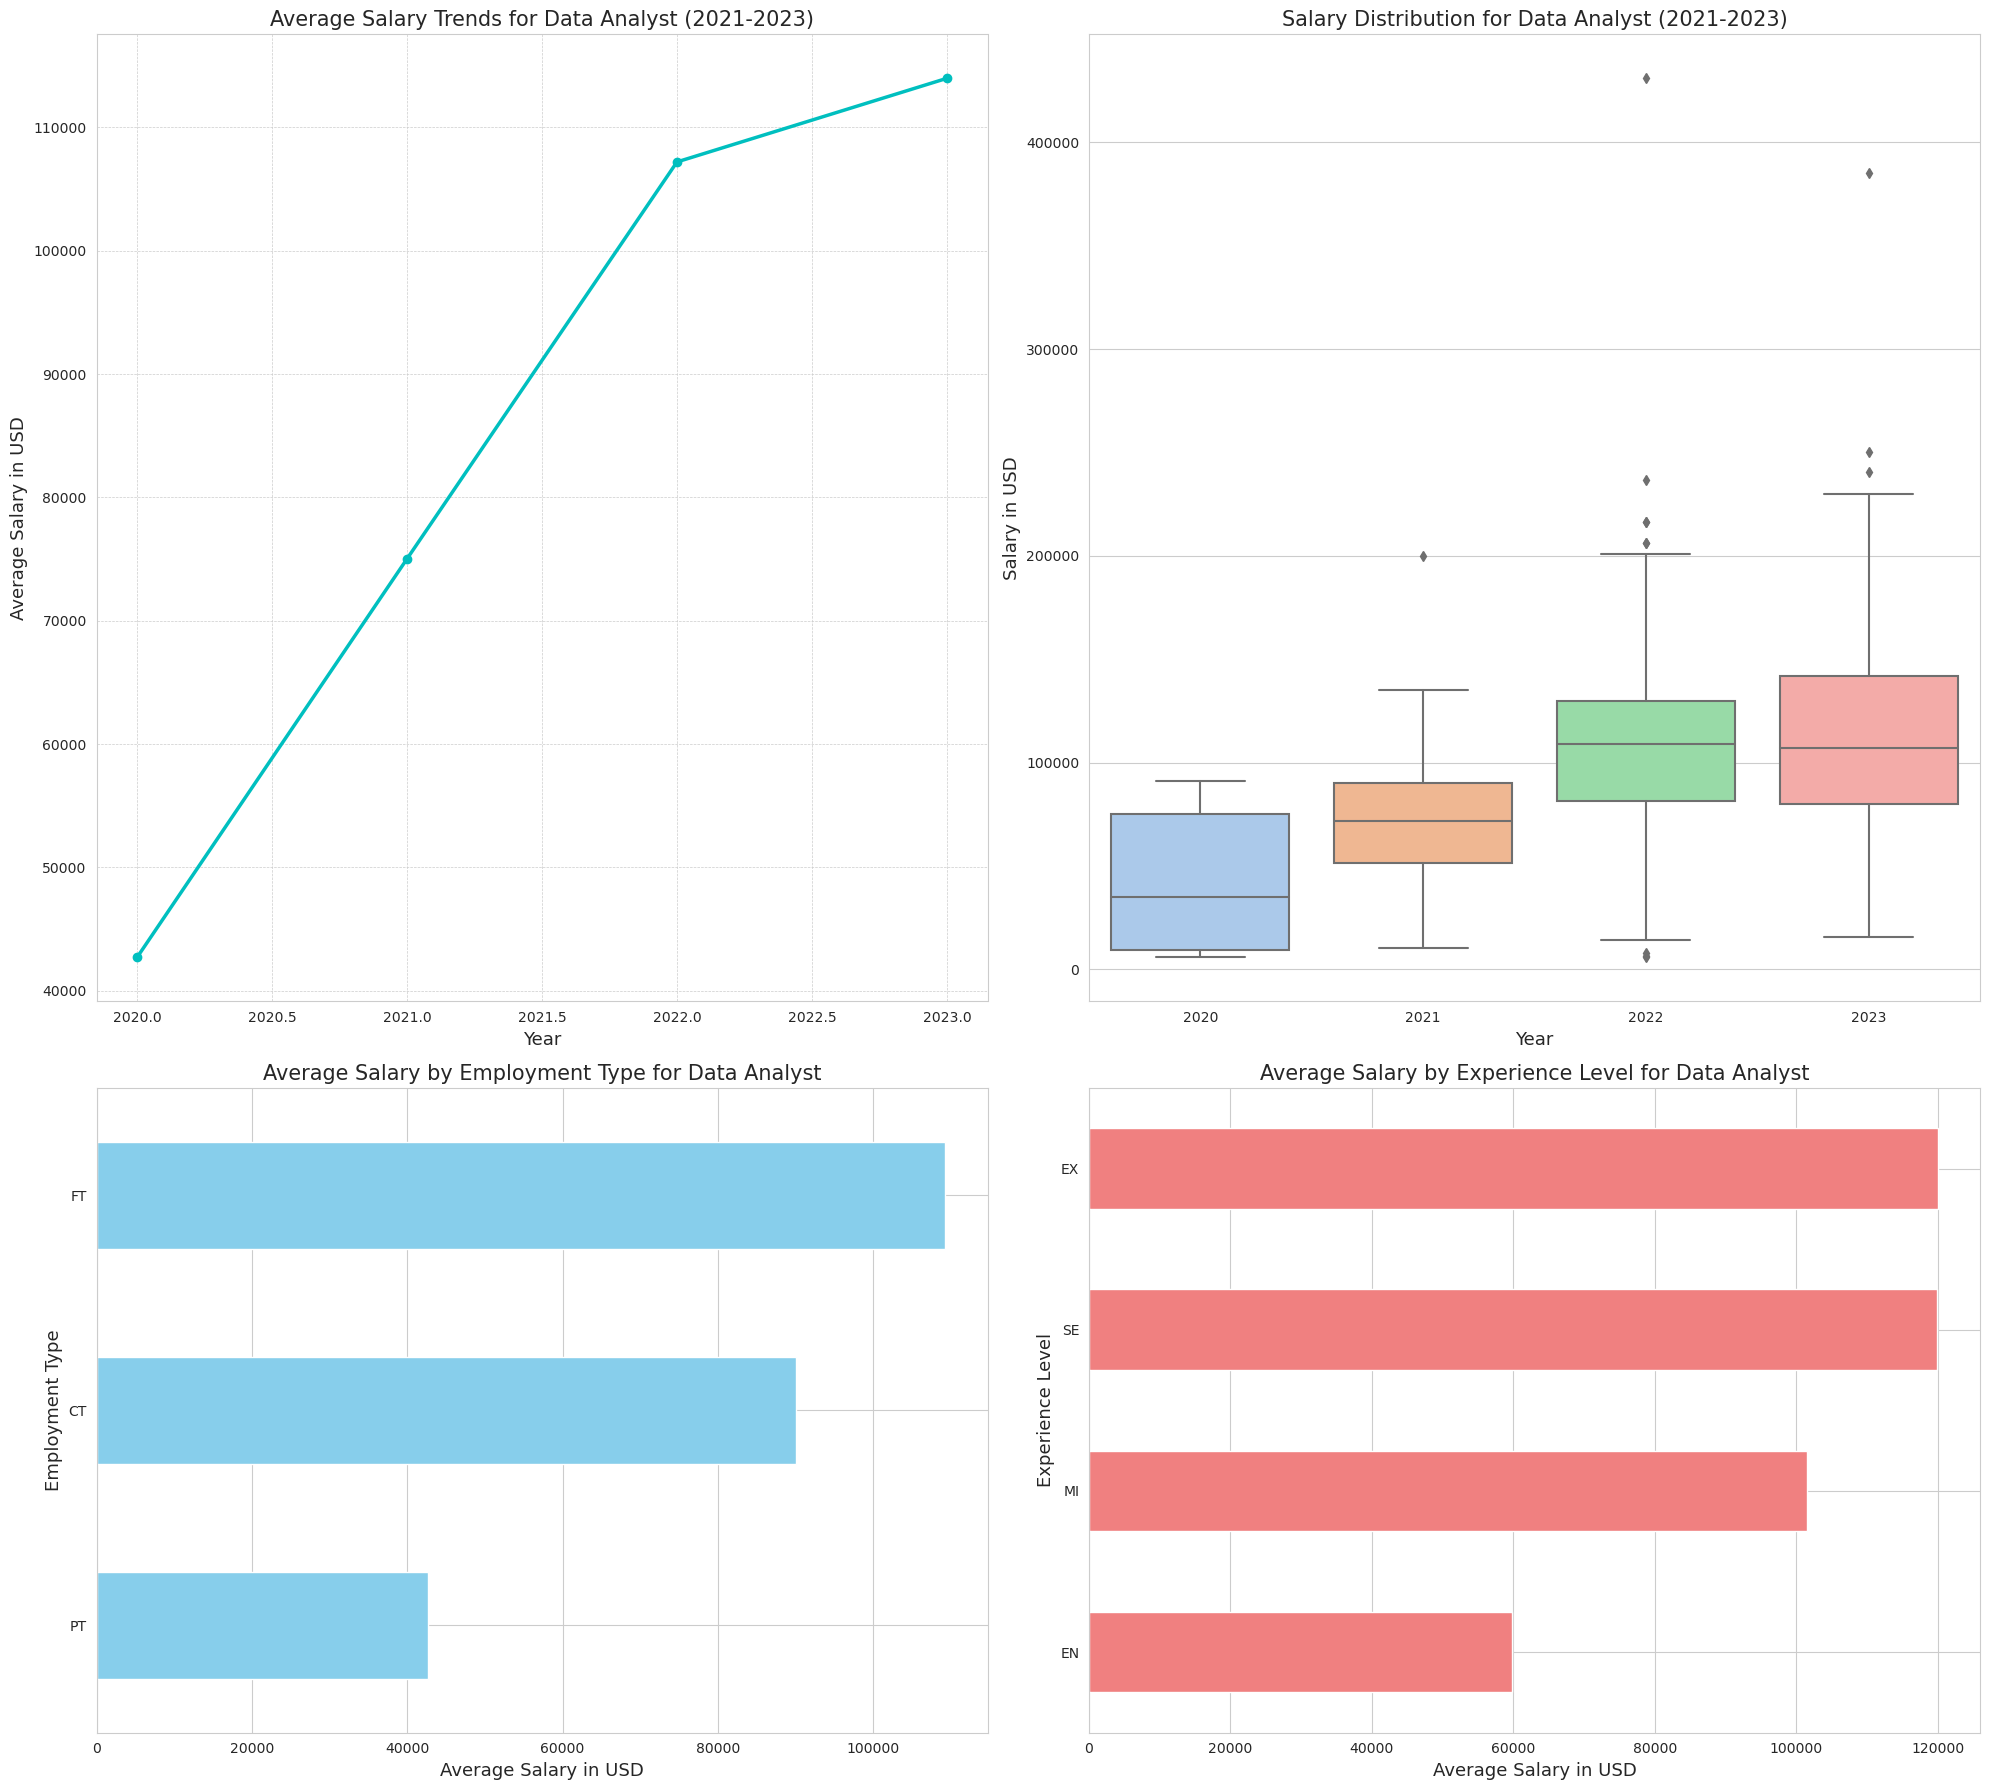

In [37]:
# Filter the dataset for the "Data Analyst" role
df_data_analyst = df_salary[df_salary["job_title"] == "Data Analyst"]

# Set up the figure and gridspec
plt.figure(figsize=(20, 18))
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[0.6, 0.4])

# 1. Salary Trends over Years: Line plot for average salary from 2021 to 2023.
ax0 = plt.subplot(gs[0, 0])
df_data_analyst.groupby('work_year')["salary_in_usd"].mean().plot(ax=ax0, marker='o', color='c', linewidth=2.5)
ax0.set_title("Average Salary Trends for Data Analyst (2021-2023)", fontsize=15)
ax0.set_xlabel("Year", fontsize=13)
ax0.set_ylabel("Average Salary in USD", fontsize=13)
ax0.grid(True, which='both', linestyle='--', linewidth=0.5)

# 2. Salary Distribution: Box plot for salary distribution over the years.
ax1 = plt.subplot(gs[0, 1])
sns.boxplot(x="work_year", y="salary_in_usd", data=df_data_analyst, palette="pastel", ax=ax1)
ax1.set_title("Salary Distribution for Data Analyst (2021-2023)", fontsize=15)
ax1.set_xlabel("Year", fontsize=13)
ax1.set_ylabel("Salary in USD", fontsize=13)

# 3. Employment Type Analysis: Bar plot for average salary based on employment type.
ax2 = plt.subplot(gs[1, 0])
df_data_analyst.groupby('employment_type')["salary_in_usd"].mean().sort_values().plot(kind='barh', color='skyblue', ax=ax2)
ax2.set_title("Average Salary by Employment Type for Data Analyst", fontsize=15)
ax2.set_xlabel("Average Salary in USD", fontsize=13)
ax2.set_ylabel("Employment Type", fontsize=13)

# 4. Experience Level Analysis: Bar plot for average salary based on experience levels.
ax3 = plt.subplot(gs[1, 1])
df_data_analyst.groupby('experience_level')["salary_in_usd"].mean().sort_values().plot(kind='barh', color='lightcoral', ax=ax3)
ax3.set_title("Average Salary by Experience Level for Data Analyst", fontsize=15)
ax3.set_xlabel("Average Salary in USD", fontsize=13)
ax3.set_ylabel("Experience Level", fontsize=13)

# Adjust the layout
plt.tight_layout()
plt.show()


**Visualization capturing the career aspects of the "Data Analyst" role from 2021 to 2023:**

* **Salary Trends over Years:** This line plot illustrates how the average salary for a Data Analyst has evolved from 2021 to 2023, showing a positive upward trend.
* **Salary Distribution:** The box plot reveals the overall distribution of salaries for Data Analysts across the years. The central line in the box represents the median salary, while the box's boundaries show the interquartile range. Any points outside of the whiskers can be potential outliers.
* **Employment Type Analysis:** The horizontal bar chart shows the average salary for Data Analysts based on different employment types, with Full-Time roles generally offering higher compensation.
* **Experience Level Analysis:** Another horizontal bar chart showcases the average salary for Data Analysts based on different experience levels. As expected, more experienced professionals command higher salaries.

***When considering a career progression, especially in the field of Data Analytics and Data Science, the path often involves acquiring new skills, gaining expertise in specialized areas, and aligning with industry trends. Here's a visual representation of a potential career progression for someone with 3 years of experience, along with the suggested actions and milestones to achieve at each stage:***

**Entry Level (0-2 years):**

**Title:** Data Analyst / Junior Data Scientist
**Key Actions:**
Master core statistical and analytical tools (R, Python).
Develop expertise in data cleaning and preprocessing.
Gain experience with data visualization tools (Tableau, PowerBI, etc.).
Work on real-world projects and showcase them (Kaggle, GitHub).

**Mid-Level (2-5 years):**

**Title:** Data Scientist / Senior Data Analyst
**Key Actions:**
Dive deeper into Machine Learning algorithms.
Specialize in a domain (NLP, Computer Vision, Time Series Analysis).
Collaborate with cross-functional teams.
Contribute to or lead data-driven projects.

**Senior Level (5-8 years):**

Title: Senior Data Scientist / Lead Analyst
Key Actions:
Start managing a team or mentoring juniors.
Engage in strategy and decision-making processes.
Drive large-scale projects.
Collaborate on research papers or present at conferences.

**Expert Level (8+ years):**

**Title:** Principal Data Scientist / Data Science Manager
**Key Actions:**
Lead organizational data strategy.
Stay updated with cutting-edge techniques and tools.
Engage in high-level stakeholder meetings.
Influence business decisions directly.

**Specializations & Further Progression:**

**Titles:** ML Engineer, AI Specialist, Chief Data Officer, etc.
**Key Actions:**
Consider a PhD or specialized courses if aligned with career goals.
Lead company-wide data initiatives.
Engage with the broader data community (speak at conferences, publish papers).


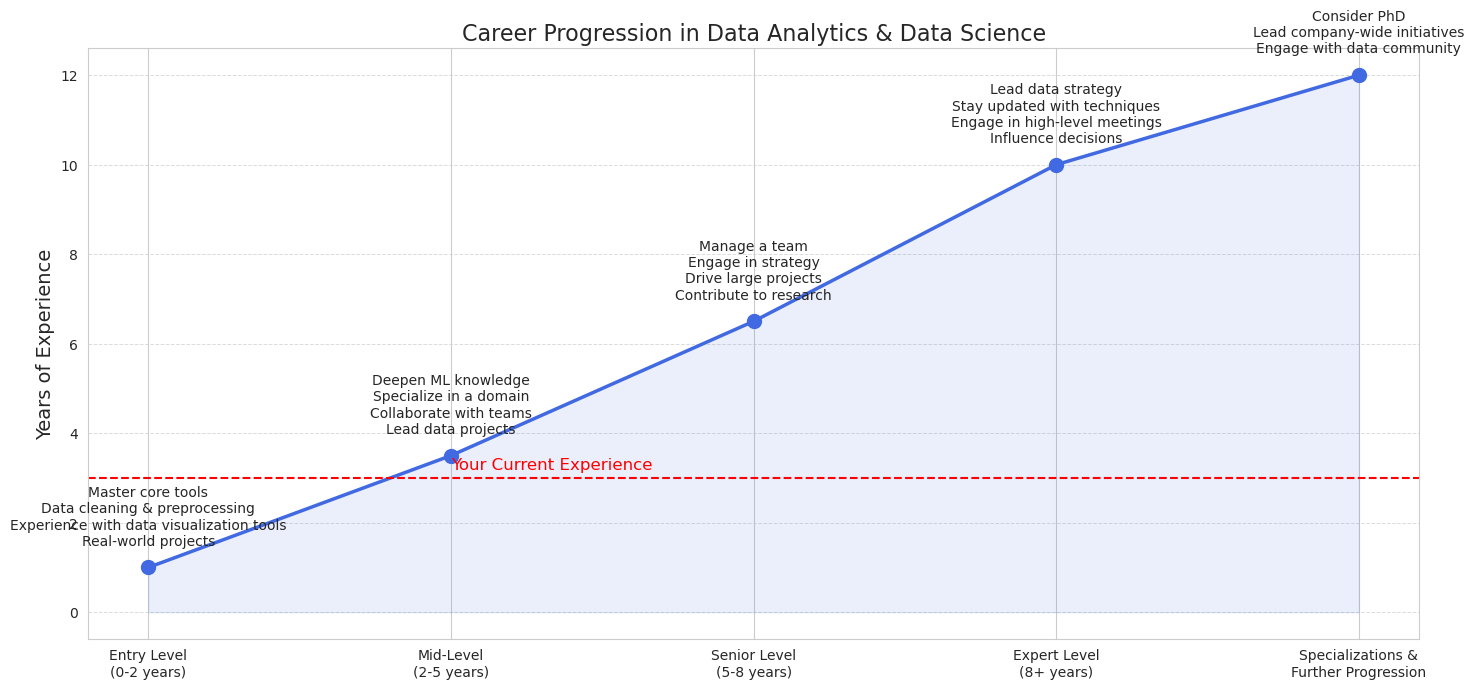

In [38]:
# Data for plotting the career progression
career_stages = ["Entry Level\n(0-2 years)", "Mid-Level\n(2-5 years)", "Senior Level\n(5-8 years)", "Expert Level\n(8+ years)", "Specializations &\nFurther Progression"]
years_experience = [1, 3.5, 6.5, 10, 12]

# Plotting the career progression
plt.figure(figsize=(15, 7))
plt.plot(career_stages, years_experience, '-o', color='royalblue', markersize=10, linewidth=2.5)
plt.fill_between(career_stages, years_experience, color='royalblue', alpha=0.1)
plt.axhline(y=3, color='red', linestyle='--', linewidth=1.5)  # Line representing current experience
plt.text(1, 3.2, 'Your Current Experience', color='red', fontsize=12)

# Annotations for key actions
annotations = [
    "Master core tools\nData cleaning & preprocessing\nExperience with data visualization tools\nReal-world projects",
    "Deepen ML knowledge\nSpecialize in a domain\nCollaborate with teams\nLead data projects",
    "Manage a team\nEngage in strategy\nDrive large projects\nContribute to research",
    "Lead data strategy\nStay updated with techniques\nEngage in high-level meetings\nInfluence decisions",
    "Consider PhD\nLead company-wide initiatives\nEngage with data community"
]

for i, txt in enumerate(annotations):
    plt.annotate(txt, (career_stages[i], years_experience[i] + 0.5), fontsize=10, ha='center')

plt.title("Career Progression in Data Analytics & Data Science", fontsize=16)
plt.ylabel("Years of Experience", fontsize=14)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


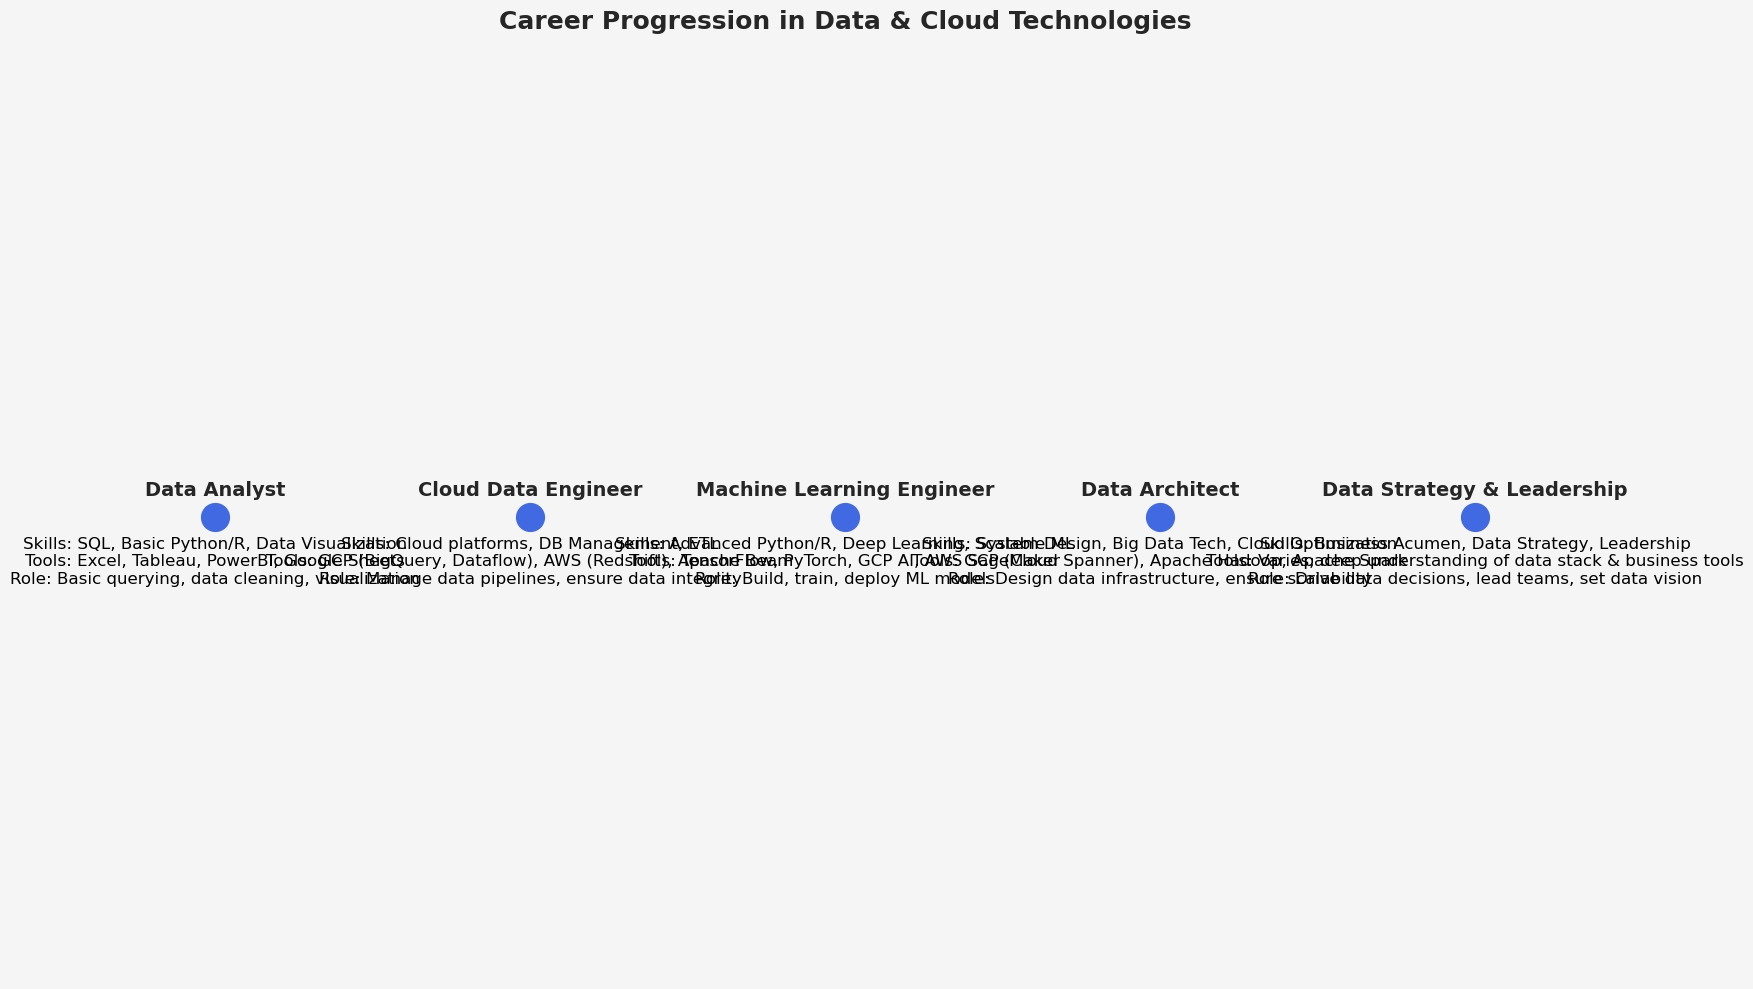

In [39]:
# Data for plotting the career progression

# Career stages, skills, tools, and roles
career_stages = ["Data Analyst", "Cloud Data Engineer", "Machine Learning Engineer", "Data Architect", "Data Strategy & Leadership"]
skills = [
    "SQL, Basic Python/R, Data Visualization",
    "Cloud platforms, DB Management, ETL",
    "Advanced Python/R, Deep Learning, Scalable ML",
    "System Design, Big Data Tech, Cloud Optimization",
    "Business Acumen, Data Strategy, Leadership"
]
tools = [
    "Excel, Tableau, PowerBI, Google Sheets",
    "GCP (BigQuery, Dataflow), AWS (Redshift), Apache Beam",
    "TensorFlow, PyTorch, GCP AI, AWS SageMaker",
    "GCP (Cloud Spanner), Apache Hadoop, Apache Spark",
    "Varies; deep understanding of data stack & business tools"
]
roles = [
    "Basic querying, data cleaning, visualization",
    "Manage data pipelines, ensure data integrity",
    "Build, train, deploy ML models",
    "Design data infrastructure, ensure scalability",
    "Drive data decisions, lead teams, set data vision"
]

# Set up the figure and gridspec
fig, ax = plt.subplots(figsize=(18, 10))
background_color = "#f5f5f5"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plotting the career progression path
for i, stage in enumerate(career_stages):
    ax.plot(i, 0, 'o', markersize=20, color='royalblue')
    ax.text(i, 0.02, stage, ha='center', va='bottom', fontsize=14, fontweight='bold')
    ax.text(i, -0.02, f"Skills: {skills[i]}\nTools: {tools[i]}\nRole: {roles[i]}", 
            ha='center', va='top', fontsize=12, color='black', wrap=True, multialignment='center')

# Setting up the appearance of the plot
ax.set_xlim(-0.5, len(career_stages)-0.5)
ax.set_ylim(-0.5, 0.5)
ax.axis('off')
ax.set_title("Career Progression in Data & Cloud Technologies", fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


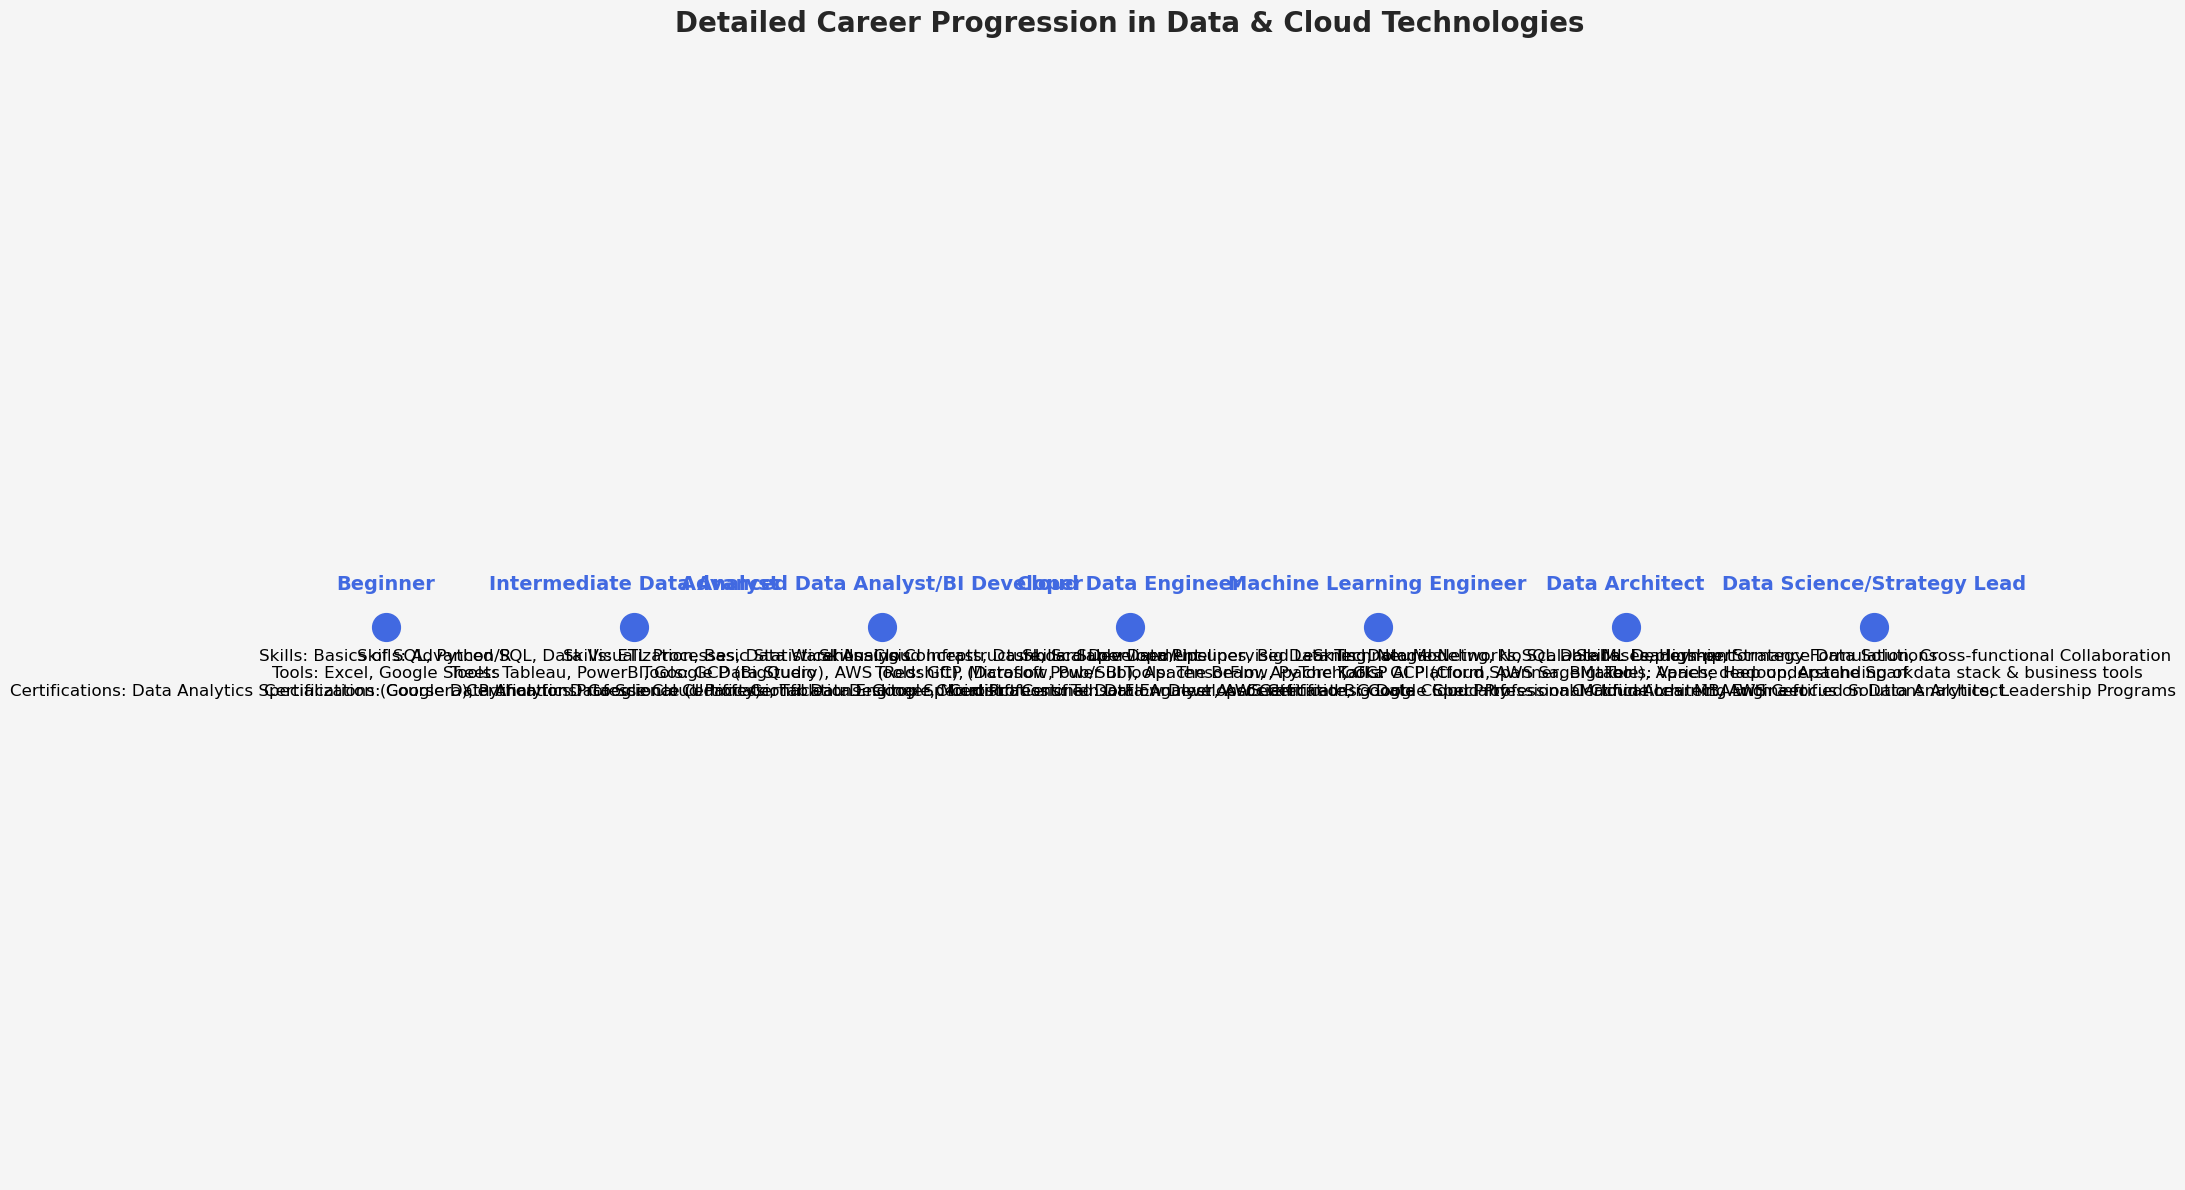

In [40]:
# Data for plotting the detailed career progression

# Career stages, skills, tools, and certifications
career_stages_detailed = [
    "Beginner", "Intermediate Data Analyst", "Advanced Data Analyst/BI Developer", 
    "Cloud Data Engineer", "Machine Learning Engineer", "Data Architect", "Data Science/Strategy Lead"
]
skills_detailed = [
    "Basics of SQL, Python/R",
    "Advanced SQL, Data Visualization, Basic Statistical Analysis",
    "ETL Processes, Data Warehousing Concepts, Dashboard Development",
    "Cloud Infrastructure, Scalable Data Pipelines, Big Data Technologies",
    "Supervised/Unsupervised Learning, Neural Networks, Scalable ML Deployment",
    "Data Modeling, NoSQL Databases, High-performance Data Solutions",
    "Leadership, Strategy Formulation, Cross-functional Collaboration"
]
tools_detailed = [
    "Excel, Google Sheets",
    "Tableau, PowerBI, Google Data Studio",
    "GCP (BigQuery), AWS (Redshift), Microsoft Power BI",
    "GCP (Dataflow, Pub/Sub), Apache Beam, Apache Kafka",
    "TensorFlow, PyTorch, GCP AI Platform, AWS SageMaker",
    "GCP (Cloud Spanner, Bigtable), Apache Hadoop, Apache Spark",
    "Varies; deep understanding of data stack & business tools"
]
certifications_detailed = [
    "Data Analytics Specialization (Coursera), Python for Data Science (Udacity)",
    "Google Data Analytics Professional Certificate, Tableau Desktop Specialist",
    "Google Cloud Professional Data Engineer, Microsoft Certified: Data Analyst Associate",
    "Google Cloud Professional Data Engineer, AWS Certified Big Data - Specialty",
    "TensorFlow Developer Certificate, Google Cloud Professional Machine Learning Engineer",
    "Google Cloud Professional Cloud Architect, AWS Certified Solutions Architect",
    "MBA with a focus on Data Analytics, Leadership Programs"
]

# Set up the figure and gridspec
fig, ax = plt.subplots(figsize=(22, 12))
background_color = "#f5f5f5"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plotting the detailed career progression path
for i, stage in enumerate(career_stages_detailed):
    ax.plot(i, 0, 'o', markersize=20, color='royalblue')
    ax.text(i, 0.03, stage, ha='center', va='bottom', fontsize=14, fontweight='bold', color='royalblue')
    ax.text(i, -0.02, f"Skills: {skills_detailed[i]}\nTools: {tools_detailed[i]}\nCertifications: {certifications_detailed[i]}", 
            ha='center', va='top', fontsize=12, color='black', wrap=True, multialignment='center')

# Setting up the appearance of the plot
ax.set_xlim(-0.5, len(career_stages_detailed)-0.5)
ax.set_ylim(-0.5, 0.5)
ax.axis('off')
ax.set_title("Detailed Career Progression in Data & Cloud Technologies", fontsize=20, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()
